In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import numpy as np
from fullsky_sims.demnunii import Demnunii
from fullsky_sims.fields import Fields
from scipy.interpolate import InterpolatedUnivariateSpline
from omegaqe import postborn
import time
import healpy as hp
from fullsky_sims.agora import Agora


Using lenspyx alm2map
mpisupport: False, pmisupport: False
disabling mpi


In [2]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['xtick.major.pad']='8'
plt.rc('figure', facecolor='w')
plt.rcParams['axes.prop_cycle'] = plt.cycler('color',['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00'])
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set3.colors)

In [25]:
dm = Demnunii(nthreads=30)
power = dm.power

Setting up cosmology with CAMB ini file at /mnt/lustre/users/astro/mr671/omegaQE/omegaqe/../fullsky_sims/data/CAMB/DEMNUnii_params.ini


In [6]:
gal = dm.sht.read_map("../cache/_maps/g_len.fits")
cl_gal = dm.sht.map2cl(gal)
ells = np.arange(np.size(cl_gal))
cl_gal_smooth = dm.sht.map2cl(gal, smoothing_nbins=150)

cl_gal_fid_true = dm.power.get_gal_ps(ells)

In [7]:
cib = dm.sht.read_map("../cache/_maps/I_len.fits")
cl_cib = dm.sht.map2cl(cib)
ells = np.arange(np.size(cl_cib))
cl_cib_smooth = dm.sht.map2cl(cib, smoothing_nbins=150)

cl_cib_fid_true = dm.power.get_cib_ps(ells)

In [8]:
k = dm.get_kappa_map(pb=True)
cl_k = dm.sht.map2cl(k)
ells = np.arange(np.size(cl_k))
cl_k_smooth = dm.sht.map2cl(k, smoothing_nbins=150)

cl_k_fid_true = dm.power.get_kappa_ps(ells)

In [9]:

cl_gI = dm.sht.map2cl(cib, gal)
cl_gI_fid_true = dm.power.get_cib_gal_ps(ells)


In [10]:
cl_kI = dm.sht.map2cl(k, cib)
cl_kI_fid_true = dm.power.get_cib_kappa_ps(ells)

cl_kg = dm.sht.map2cl(k, gal)
cl_kg_fid_true = dm.power.get_gal_kappa_ps(ells)

In [11]:
gal = dm.sht.read_map("../cache/_maps/g.fits")
cib = dm.sht.read_map("../cache/_maps/I.fits")

In [12]:
cl_kI2 = dm.sht.map2cl(k, cib)
cl_kg2 = dm.sht.map2cl(k, gal)


(2, 5000)

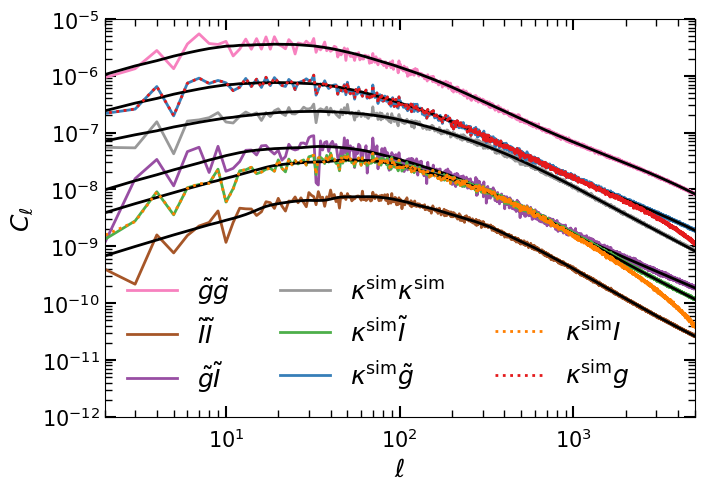

In [13]:
plt.rcParams['figure.figsize'] = [8, 6]
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)

ax.loglog(ells, cl_gal, label=r"$\tilde{g}\tilde{g}$", linewidth=2, color='#f781bf')
ax.plot(ells, cl_gal_fid_true, color="k", linewidth=2)

ax.loglog(ells, cl_cib, label=r"$\tilde{I}\tilde{I}$", linewidth=2, color='#a65628')
ax.plot(ells, cl_cib_fid_true, color="k", linewidth=2)

ax.loglog(ells, cl_gI, label=r"$\tilde{g}\tilde{I}$", linewidth=2, color='#984ea3')
ax.plot(ells, cl_gI_fid_true, color="k", linewidth=2)

ax.loglog(ells, cl_k, label=r"$\kappa^{\mathrm{sim}}\kappa^{\mathrm{sim}}$", linewidth=2, color='#999999')
ax.plot(ells, cl_k_fid_true, color="k", linewidth=2)

ax.loglog(ells, cl_kI, label=r"$\kappa^{\mathrm{sim}} \tilde{I}$", linewidth=2, color='#4daf4a')
ax.plot(ells, cl_kI_fid_true, color="k", linewidth=2)

ax.loglog(ells, cl_kg, label=r"$\kappa^{\mathrm{sim}} \tilde{g}$", linewidth=2, color='#377eb8')
ax.plot(ells,cl_kg_fid_true, color="k", linewidth=2)


ax.plot(0,0,alpha=0, label=" ", color="k")
ax.loglog(ells,cl_kI2, label=r"$\kappa^{\mathrm{sim}} I$", linewidth=2, linestyle=":", color='#ff7f00')
ax.loglog(ells, cl_kg2, label=r"$\kappa^{\mathrm{sim}} g$", linewidth=2, linestyle=":", color='#e41a1c')

# ax.grid(which="both")

ax.legend(prop={'size': 18}, frameon=False, ncol=3, loc=3)
ax.set_ylabel("$C_{\ell}$", fontsize=18)
ax.set_xlabel("$\ell$", fontsize=18)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax.tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax.tick_params(labelsize=15)
ax.set_ylim(1e-12, 1e-5)
ax.set_xlim(2, 5000)
# ax.grid()

# ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

# fig.savefig("_plots/LSS_cls.pdf", bbox_inches='tight')

In [14]:
k = dm.get_kappa_map(pb=True)
cib = dm.sht.read_map("../cache/_maps/I_len.fits")
gal = dm.sht.read_map("../cache/_maps/g_len.fits")

Text(0.5, 30.472222222222207, '$\\ell$')

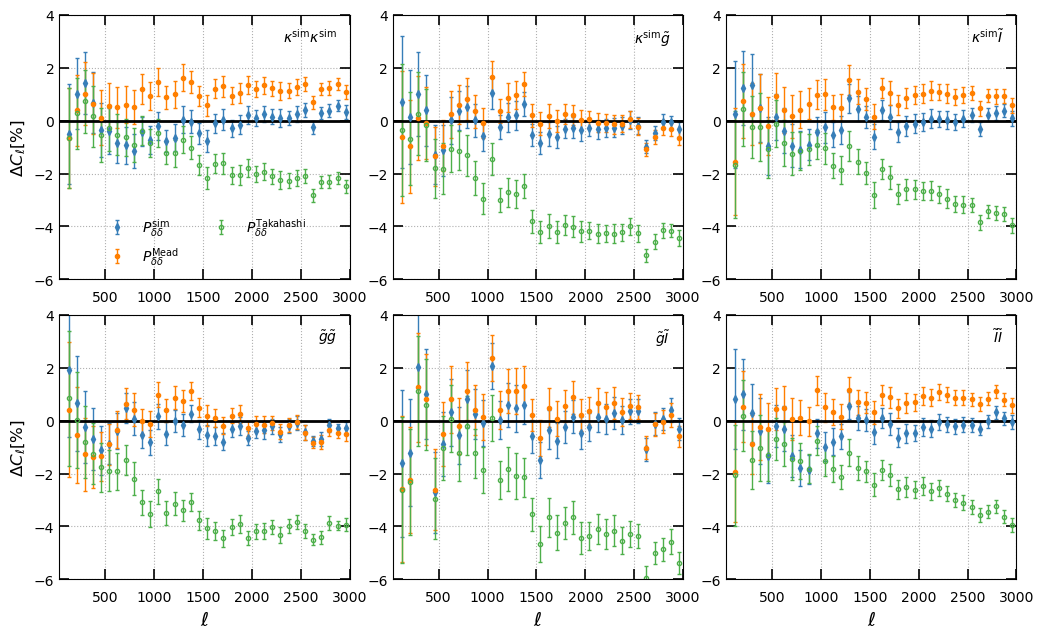

In [15]:
plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots(2,3)
fig.tight_layout(pad=0)
maps = {"k":k, "I":cib, "g":gal}
typs = ["kk", "kg", "kI", "gg", "gI", "II"]
for iii, typ in enumerate(typs):
    col = iii if iii < 3 else iii - 3
    row = 0 if iii < 3 else 1
    cl = dm.sht.map2cl(maps[typ[0]], maps[typ[1]])
    cl_bin, bins, err = dm.sht.bin_cl(cl, nbins=60)
    cl_bin = cl_bin[1:]
    bins = bins[1:]
    err = err[1:]
    
    power.matter_PK = dm.get_PK()
    cl_fid_bins = power.get_ps(typ, bins)
    ax[row][col].errorbar(bins, (cl_bin-cl_fid_bins)/cl_bin*100, err/cl_bin*100, linestyle="", marker="d", label="$P^{\mathrm{sim}}_{\delta\delta}$", markersize=4, elinewidth=1, capsize=1.5)

    
    power.cosmo._pars.NonLinearModel.set_params(halofit_version='mead')
    power.matter_PK = power.cosmo.get_matter_PK(typ="matter")
    cl_fid_bins = power.get_ps(typ, bins)
    ax[row][col].errorbar(bins, (cl_bin-cl_fid_bins)/cl_bin *100, err/cl_bin *100, linestyle="", marker=".", label="$P^{\mathrm{Mead}}_{\delta\delta}$", markersize=6, elinewidth=1, capsize=1.5)

    power.cosmo._pars.NonLinearModel.set_params(halofit_version='takahashi')
    power.matter_PK = power.cosmo.get_matter_PK(typ="matter")
    cl_fid_bins = power.get_ps(typ, bins)
    ax[row][col].errorbar(bins, (cl_bin-cl_fid_bins)/cl_bin*100, err/cl_bin*100, linestyle="", marker="o", label="$P^{\mathrm{Takahashi}}_{\delta\delta}$", markersize=3, elinewidth=1, capsize=1.5, mfc='none')

    

    ax[row][col].plot([0,5000],[0,0], color="k", linewidth=2)
    ax[row][col].set_ylim(-6, 4)
    ax[row][col].set_xlim(30, 3000)
    ax[row][col].tick_params(top=True, right=True, direction="in", which="minor", length=4, width=0.7)
    ax[row][col].tick_params(top=True, right=True, direction="in", which="major", length=7, width=1.2)
    ax[row][col].tick_params(labelsize=10)
    typ_label_1 = r'\tilde{'+f'{typ[0]}'+'}' if typ[0] != "k" else r'\kappa^{\mathrm{sim}}'
    typ_label_2 = r'\tilde{'+f'{typ[1]}'+'}' if typ[1] != "k" else r'\kappa^{\mathrm{sim}}'

    typ_label = "$" + typ_label_1+typ_label_2 +"$"
    anchored_text = AnchoredText(typ_label, loc=1, frameon=False, prop={'size': 10})
    ax[row][col].add_artist(anchored_text)
    ax[row][col].grid(linestyle=":")

ax[0,0].legend(prop={'size': 10}, frameon=False, ncol=2, loc=8)
ax[0,0].set_ylabel("$\Delta C_{\ell}$[%]", fontsize=12)
ax[1,0].set_ylabel("$\Delta C_{\ell}$[%]", fontsize=12)
ax[1,0].set_xlabel("$\ell$", fontsize=14)
ax[1,1].set_xlabel("$\ell$", fontsize=14)
ax[1,2].set_xlabel("$\ell$", fontsize=14)

# fig.savefig("_plots/LSS_diff.pdf", bbox_inches='tight')

In [26]:
omega = dm.get_omega_map()
cl_omega = dm.sht.map2cl(omega)
cl_omega_smooth = dm.sht.smoothed_cl(cl_omega, 100)

In [27]:
Cl_ww_fid_mead = np.load("../cache/_C_omega/C_omega_mead.npy")
Cl_ww_fid_taki = np.load("../cache/_C_omega/C_omega_taki.npy")
Cl_ww_fid_true = np.load("../cache/_C_omega/C_omega.npy")
my_ells = w_ells = np.load("../cache/_C_omega/Ls.npy")

In [28]:
Cl_ww_fid_taki_bins = InterpolatedUnivariateSpline(w_ells, Cl_ww_fid_taki)(bins)
Cl_ww_fid_mead_bins = InterpolatedUnivariateSpline(w_ells, Cl_ww_fid_mead)(bins)
Cl_ww_fid_true_bins = InterpolatedUnivariateSpline(my_ells, Cl_ww_fid_true)(bins)

In [29]:
Cl_ww_fid_taki_ = InterpolatedUnivariateSpline(w_ells, Cl_ww_fid_taki)(np.arange(5001))
Cl_ww_fid_mead_ = InterpolatedUnivariateSpline(w_ells, Cl_ww_fid_mead)(np.arange(5001))
Cl_ww_fid_true_ = InterpolatedUnivariateSpline(my_ells, Cl_ww_fid_true)(np.arange(5001))

(30, 3000)

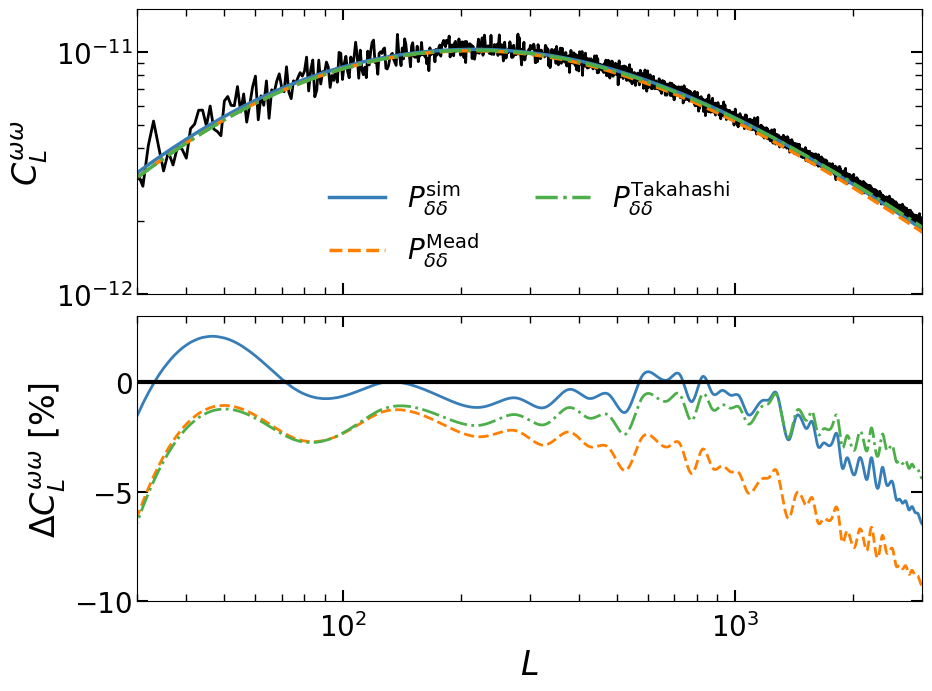

In [33]:
plt.rcParams['figure.figsize'] = [8, 6]
fig, ax = plt.subplots(2,1)
fig.tight_layout(pad=-1)

ax[0].loglog(cl_omega, color="k", linewidth=2)
ax[0].plot(my_ells, Cl_ww_fid_true, linewidth=2.5, label="$P^{\mathrm{sim}}_{\delta\delta}$", linestyle="-")
ax[0].plot(w_ells, Cl_ww_fid_mead, linewidth=2.5, label="$P^{\mathrm{Mead}}_{\delta\delta}$", linestyle="--")
ax[0].plot(w_ells, Cl_ww_fid_taki, linewidth=2.5, label="$P^{\mathrm{Takahashi}}_{\delta\delta}$", linestyle="-.")

ax[0].legend(prop={'size': 20}, frameon=False, ncol=2)
# ax[0].yaxis.get_offset_text().set_fontsize(13)
ax[0].set_ylabel("$C^{\omega\omega}_{L}$", fontsize=24)
ax[0].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[0].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[0].tick_params(labelsize=20)
ax[0].set_ylim(0.1e-11,1.5e-11)
ax[0].set_xlim(30, 3000)
ax[0].tick_params(labelbottom=False)  


ax[1].plot(((Cl_ww_fid_true_-cl_omega_smooth)/Cl_ww_fid_true_)*100, linestyle="-",  label="$P^{\mathrm{sim}}$", linewidth=2)
ax[1].plot(((Cl_ww_fid_mead_-cl_omega_smooth)/Cl_ww_fid_mead_)*100, linestyle="--", label="$P^{\mathrm{Mead}}$", linewidth=2)
ax[1].plot(((Cl_ww_fid_taki_-cl_omega_smooth)/Cl_ww_fid_taki_)*100, linestyle="-.",  label="$P^{\mathrm{Takahashi}}$", linewidth=2)


# ax[1].errorbar(bins, ((Cl_ww_fid_true_bins-cl_bin)/Cl_ww_fid_true_bins)*100, (err/Cl_ww_fid_true_bins)*100, linestyle="", marker="d", label="DEMNUnii", markersize=8, elinewidth=2, capsize=3)
# ax[1].errorbar(bins, ((Cl_ww_fid_mead_bins-cl_bin)/Cl_ww_fid_mead_bins)*100, (err/Cl_ww_fid_true_mead)*100, linestyle="", marker=".", markersize=12, elinewidth=2, capsize=3)
# ax[1].errorbar(bins, ((Cl_ww_fid_taki_bins-cl_bin)/Cl_ww_fid_taki_bins)*100, (err/Cl_ww_fid_true_taki)*100, linestyle="", marker="o", label="Takahashi", markersize=6, elinewidth=2, capsize=3, mfc='none')
ax[1].semilogx([0,5000],[0,0], color="k", linewidth=3)

ax[1].set_ylabel("$\Delta C^{\omega\omega}_{L}$ [%]", fontsize=24)
ax[1].set_xlabel("$L$", fontsize=24)
ax[1].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[1].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[1].tick_params(labelsize=20)
ax[1].set_ylim(-10,3)
ax[1].set_xlim(30, 3000)

# fig.savefig("_plots/delta_omega.pdf", bbox_inches='tight')


In [53]:
omega_tem = dm.sht.read_map(f"../cache/_tems/zero_dem/S4_base/kgI/omega_tem_0_len_nN_gmv.fits")
cl_cross = dm.sht.map2cl(omega,omega_tem)
nbins = 25
Lmin = 30
Lmax = 3001
ps_cross,bins,err_cross = dm.sht.bin_cl(cl_cross[Lmin:Lmax+1],nbins)
bins+=Lmin
Cl_ww_fid_true_bins,_,err_fid = dm.sht.bin_cl(Cl_ww_fid_true[Lmin:Lmax+1], nbins)

In [11]:
# nbins=25
# field = Fields("SO_goal", use_lss_cache=True, use_cmb_cache=True, deflect_typ="zero_dem", nthreads=30, len_lss=True)
# omega_tem = field.omega_template(15, cmb_noise=False)
# omega_tem = dm.sht.alm2map(omega_tem)

# omega = dm.get_omega_map()
# cl_cross = dm.sht.map2cl(omega,omega_tem)
# ps_cross,_,err_cross = dm.sht.bin_cl(cl_cross[Lmin:Lmax+1],nbins)

Setting up cosmology with CAMB ini file at /mnt/lustre/users/astro/mr671/omegaQE/omegaqe/../fullsky_sims/data/CAMB/DEMNUnii_params.ini
Setting up noise...
Getting cached N0 for exp: SO_goal, qe: TEB, gmv: True, ps: gradient, L_cuts: (30, 3000, 30, 5000), iter: False, iter_ext: False, data_dir: /mnt/lustre/users/astro/mr671/omegaQE/fullsky_sims/data/
Using cache for map: k
Using cache for map: g
  Using cached lensed g map.
Using cache for map: I
  Using cached lensed I map.
Setting up noise...
Getting cached N0 for exp: SO_goal, qe: TEB, gmv: True, ps: gradient, L_cuts: (30, 3000, 30, 5000), iter: False, iter_ext: False, data_dir: /mnt/lustre/users/astro/mr671/omegaQE/fullsky_sims/data/
LSST_gold
Creating filtered maps for template. Noise included: False.
[0:05:14] 100%


In [49]:
mead_omega_tem = dm.sht.read_map(f"../cache/_tems/zero_dem/S4_base/kgI/mead_omega_tem_0_len_nN_gmv.fits")
omega = dm.get_omega_map()
cl_cross_mead = dm.sht.map2cl(omega,mead_omega_tem)
ps_cross_mead,_,err_cross_mead = dm.sht.bin_cl(cl_cross_mead[Lmin:Lmax+1],nbins)

In [50]:
taki_omega_tem = dm.sht.read_map(f"../cache/_tems/zero_dem/S4_base/kgI/taki_omega_tem_0_len_nN_gmv.fits")
omega = dm.get_omega_map()
cl_cross_taki = dm.sht.map2cl(omega,taki_omega_tem)
ps_cross_taki,_,err_cross_taki = dm.sht.bin_cl(cl_cross_taki[Lmin:Lmax+1],nbins)

(-4.0, 6.0)

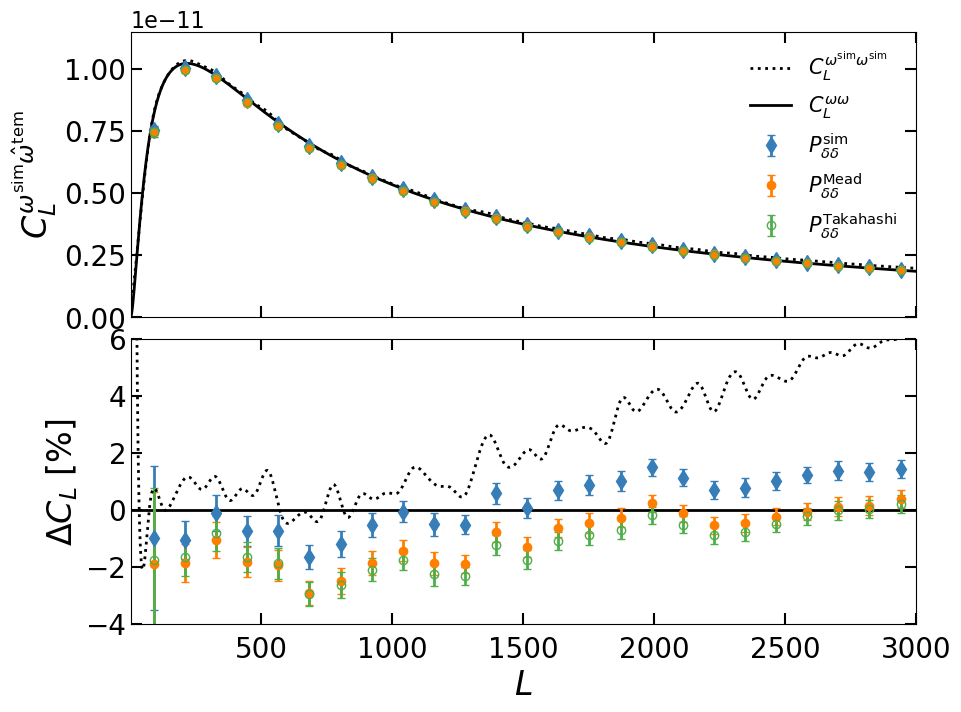

In [55]:
plt.rcParams['figure.figsize'] = [8, 6]
fig, ax = plt.subplots(2,1)
fig.tight_layout(pad=-1)


ax[0].plot(cl_omega_smooth, color="k", label="$C^{\omega^{\mathrm{sim}}\omega^{\mathrm{sim}}}_L$", linewidth=2, linestyle=":")
ax[0].plot(np.arange(5001), Cl_ww_fid_true_, color="k", label="$C^{\omega\omega}_L$", linewidth=2)
ax[0].errorbar(bins, ps_cross, err_cross, linestyle="", marker="d", markersize=8, elinewidth=2, capsize=3, label="$P^{\mathrm{sim}}_{\delta\delta}$")
ax[0].errorbar(bins, ps_cross_mead, err_cross_mead, linestyle="", marker=".", markersize=12, elinewidth=2, capsize=3, label="$P^{\mathrm{Mead}}_{\delta\delta}$")
ax[0].errorbar(bins, ps_cross_taki, err_cross_taki, linestyle="", marker="o", markersize=6, elinewidth=2, capsize=3, mfc='none', label="$ P^{\mathrm{Takahashi}}_{\delta\delta}$")
# ax[0].errorbar(bins, ps_cross*fac, err_cross*fac, linestyle="", marker="^", markersize=6, elinewidth=2, capsize=3, label="$P^{\mathrm{sim}}_{\delta\delta}$ (corrected)")


ax[0].yaxis.get_offset_text().set_fontsize(16)
ax[0].legend(prop={'size': 15}, frameon=False, ncol=1)
ax[0].set_ylabel("$C^{\omega^{\mathrm{sim}}\hat{\omega}^{\mathrm{tem}}}_{L}$", fontsize=24)
ax[0].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[0].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[0].tick_params(labelsize=20)
ax[0].set_ylim(0, 1.15e-11)
ax[0].set_xlim(2, 3000)
ax[0].tick_params(labelbottom=False)



ax[1].plot([0,5000],[0,0], color="k", linewidth=2)
ax[1].errorbar(bins, (ps_cross - Cl_ww_fid_true_bins)/Cl_ww_fid_true_bins*100, err_cross/Cl_ww_fid_true_bins*100, linestyle="", marker="d", label="$\omega^{\mathrm{pb}}\hat{\omega}^{\mathrm{tem}}$ (CMB-S4)", markersize=8, elinewidth=2, capsize=3)
ax[1].errorbar(bins, (ps_cross_mead - Cl_ww_fid_true_bins)/Cl_ww_fid_true_bins*100, err_cross_mead/Cl_ww_fid_true_bins*100, linestyle="", marker=".", label="$\omega^{\mathrm{pb}}\hat{\omega}^{\mathrm{tem}}$ (CMB-S4) mead", markersize=12, elinewidth=2, capsize=3)
ax[1].errorbar(bins, (ps_cross_taki - Cl_ww_fid_true_bins)/Cl_ww_fid_true_bins*100, err_cross_taki/Cl_ww_fid_true_bins*100, linestyle="", marker="o", markersize=6, elinewidth=2, capsize=3, mfc='none', label="$\omega^{\mathrm{pb}}\hat{\omega}^{\mathrm{tem}}$ (CMB-S4) taki")
ax[1].plot(((cl_omega_smooth-Cl_ww_fid_true_)/Cl_ww_fid_true_)*100, linestyle=":", linewidth=2, color="k")



ax[1].yaxis.get_offset_text().set_fontsize(16)
ax[1].set_ylabel("$\Delta C_{L}$ [%]", fontsize=24)
ax[1].set_xlabel("$L$", fontsize=24)
ax[1].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[1].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[1].tick_params(labelsize=20)
ax[1].set_xlim(2,3000)
ax[1].set_ylim(-4,6)

# fig.savefig("_plots/omega_only_long.pdf", bbox_inches='tight')

In [30]:
#new
nbins=30

ps_pb_4, bins, err_pb_4 = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_zero/S4_base/kgI/ps_20_TEB_len_gmv_TEB.npy")[30:3001], nbins)
ps_it, bins, err_it = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_zero/S4_base/kgI/ps_20_TEB_iter_len_mc_gmv_TEB_iter.npy")[30:3001], nbins)


raw_ps_pb_dem_4= np.load("../cache/_raw_ps/pbdem_dem/S4_base/kgI/ps_20_TEB_len_gmv_TEB.npy")[30:3001]

raw_ps_pb_4 = np.load("../cache/_raw_ps/pbdem_zero/S4_base/kgI/ps_20_TEB_len_gmv_TEB.npy")[30:3001]

ps_signal_4, _, err_signal_4 = dm.sht.bin_cl(raw_ps_pb_dem_4 - raw_ps_pb_4, nbins)

ps_pb_z4_sm = dm.sht.smoothed_cl(raw_ps_pb_4, 150)

# cl_w_sm_spline = InterpolatedUnivariateSpline(np.arange(np.size(Cl_ww_true_smooth)), Cl_ww_true_smooth)
# cl_w_bin = cl_w_sm_spline(bins)

raw_ps_gauss4 = np.load("../cache/_raw_ps/diff_zero/S4_base/kgI/ps_20_TEB_gauss_gmv_TEB.npy")[30:3001]

ps_signal_g_4, _, err_signal_g_4 = dm.sht.bin_cl(raw_ps_pb_dem_4 - raw_ps_gauss4, nbins)

ps_gauss4, _, err_gauss4 = dm.sht.bin_cl(np.load("../cache/_raw_ps/diff_zero/S4_base/kgI/ps_20_TEB_gauss_gmv_TEB.npy")[30:3001], nbins)
ps_non_gauss4, _, err_non_gauss4 = dm.sht.bin_cl(raw_ps_pb_4-raw_ps_gauss4, nbins)
ps_z_dem4, bins, err_z_dem4 = dm.sht.bin_cl(np.load("../cache/_raw_ps/zero_dem/S4_base/kgI/ps_20_len_nN_gmv_TEB_ncmbN.npy")[30:3001], nbins)
ps_pb_dem4, bins, err_pb_dem4 = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_dem/S4_base/kgI/ps_20_TEB_len_gmv_TEB.npy")[30:3001], nbins)

bins += 30

In [31]:
#new
nbins=20
ps_pb_, bins_so, err_pb_ = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_zero/SO_goal/kgI/ps_20_TEB_len_gmv_TEB.npy")[30:3001], nbins)
ps_it_so, bins_so, err_it_so = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_zero/SO_goal/kgI/ps_20_TEB_iter_len_mc_gmv_TEB_iter.npy")[30:3001], nbins)
ps_pb_dem_it_so, bins_so, err_pb_dem_it_so = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_dem/SO_goal/kgI/ps_20_TEB_iter_len_mc_gmv_TEB_iter.npy")[30:3001], nbins)


raw_ps_pb_dem = np.load("../cache/_raw_ps/pbdem_dem/SO_goal/kgI/ps_20_TEB_len_gmv_TEB.npy")[30:3001]

raw_ps_pb_= np.load("../cache/_raw_ps/pbdem_zero/SO_goal/kgI/ps_20_TEB_len_gmv_TEB.npy")[30:3001]
raw_ps_it_so= np.load("../cache/_raw_ps/pbdem_zero/SO_goal/kgI/ps_20_TEB_iter_len_mc_gmv_TEB_iter.npy")[30:3001]
raw_ps_pb_dem_it_so= np.load("../cache/_raw_ps/pbdem_dem/SO_goal/kgI/ps_20_TEB_iter_len_mc_gmv_TEB_iter.npy")[30:3001]
ps_signal_it, _, err_signal_it = dm.sht.bin_cl(raw_ps_pb_dem_it_so - raw_ps_it_so, nbins)



ps_signal, _, err_signal = dm.sht.bin_cl(raw_ps_pb_dem - raw_ps_pb_, nbins)

ps_pb_z_sm= dm.sht.smoothed_cl(raw_ps_pb_, 150)

# cl_w_sm_spline_so = InterpolatedUnivariateSpline(np.arange(np.size(Cl_ww_true_smooth)), Cl_ww_true_smooth)
# cl_w_bin_so = cl_w_sm_spline_so(bins_so)

raw_ps_gauss = np.load("../cache/_raw_ps/diff_zero/SO_goal/kgI/ps_20_TEB_gauss_gmv_TEB.npy")[30:3001]

ps_signal_g, _, err_signal_g = dm.sht.bin_cl(raw_ps_pb_dem - raw_ps_gauss, nbins)

ps_gauss, _, err_gauss = dm.sht.bin_cl(np.load("../cache/_raw_ps/diff_zero/SO_goal/kgI/ps_20_TEB_gauss_gmv_TEB.npy")[30:3001], nbins)
ps_non_gauss, _, err_non_gauss = dm.sht.bin_cl(raw_ps_pb_-raw_ps_gauss, nbins)

ps_z_dem, bins_so, err_z_dem = dm.sht.bin_cl(np.load("../cache/_raw_ps/zero_dem/SO_goal/kgI/ps_20_len_nN_gmv_TEB_ncmbN.npy")[30:3001], nbins)
ps_pb_dem, bins_so, err_pb_dem = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_dem/SO_goal/kgI/ps_20_TEB_len_gmv_TEB.npy")[30:3001], nbins)

bins_so += 30

In [32]:
new_results_dir_wcl = "../../../bias_old/dem_wcl_results/"
new_results_dir = "../../../bias_old/dem_results/"
Ls_SO_N2 = np.load(f"{new_results_dir_wcl}/SO_goal/TEB_gmv/kgI/N2_nN/Ls.npy")
N_SO_N2 = np.load(f"{new_results_dir_wcl}/SO_goal/TEB_gmv/kgI/N2_nN/N.npy")

Ls_SO_N2_eb = np.load(f"{new_results_dir_wcl}/SO_goal/EB_gmv/kgI/N2_nN/Ls.npy")
N_SO_N2_eb = np.load(f"{new_results_dir_wcl}/SO_goal/EB_gmv/kgI/N2_nN/N.npy")

Ls_SO_N2_it = np.load(f"{new_results_dir_wcl}/SO_goal/EB_iter_gmv/kgI/N2_nN/Ls.npy")
N_SO_N2_it = np.load(f"{new_results_dir_wcl}/SO_goal/EB_iter_gmv/kgI/N2_nN/N.npy")

Ls_SO_N1 = np.load(f"{new_results_dir_wcl}/SO_goal/TEB_gmv/kgI/N1/Ls.npy")
N_SO_N1 = np.load(f"{new_results_dir_wcl}/SO_goal/TEB_gmv/kgI/N1/N.npy")

Ls_SO_N1_eb = np.load(f"{new_results_dir_wcl}/SO_goal/EB_gmv/kgI/N1/Ls.npy")
N_SO_N1_eb = np.load(f"{new_results_dir_wcl}/SO_goal/EB_gmv/kgI/N1/N.npy")

Ls_SO_N1_it = np.load(f"{new_results_dir_wcl}/SO_goal/EB_iter_gmv/kgI/N1/Ls.npy")
N_SO_N1_it = np.load(f"{new_results_dir_wcl}/SO_goal/EB_iter_gmv/kgI/N1/N.npy")

Ls_SO_N0_eb = np.load(f"{new_results_dir_wcl}/SO_goal/EB_gmv/kgI/N0/Ls.npy")
N_SO_N0_eb = np.load(f"{new_results_dir_wcl}/SO_goal/EB_gmv/kgI/N0/N.npy")

Ls_SO_N0_it = np.load(f"{new_results_dir_wcl}/SO_goal/EB_iter_gmv/kgI/N0/Ls.npy")
N_SO_N0_it = np.load(f"{new_results_dir_wcl}/SO_goal/EB_iter_gmv/kgI/N0/N.npy")

Ls_SO_N0 = np.load(f"{new_results_dir}/SO_goal/TEB_gmv/kgI/N0/Ls.npy")
N_SO_N0 = np.load(f"{new_results_dir}/SO_goal/TEB_gmv/kgI/N0/N.npy")



N0_SO_spline = InterpolatedUnivariateSpline(Ls_SO_N0, N_SO_N0)
N1_SO_spline = InterpolatedUnivariateSpline(Ls_SO_N1, N_SO_N1)
N2_SO_spline = InterpolatedUnivariateSpline(Ls_SO_N2, N_SO_N2)

N1_SO_spline_it = InterpolatedUnivariateSpline(Ls_SO_N1_it, N_SO_N1_it)
N1_SO_spline_eb = InterpolatedUnivariateSpline(Ls_SO_N1_eb, N_SO_N1_eb)

N0_SO_spline_it = InterpolatedUnivariateSpline(Ls_SO_N0_it, N_SO_N0_it)
N0_SO_spline_eb = InterpolatedUnivariateSpline(Ls_SO_N0_eb, N_SO_N0_eb)

N2_SO_spline_it = InterpolatedUnivariateSpline(Ls_SO_N2_it, N_SO_N2_it)
N2_SO_spline_eb = InterpolatedUnivariateSpline(Ls_SO_N2_eb, N_SO_N2_eb)

N0_SO = N0_SO_spline(Ls_SO_N2)
N1_SO = N1_SO_spline(Ls_SO_N2)


In [33]:
new_results_dir_wcl = "../../../bias_old/dem_wcl_results/"
new_results_dir = "../../../bias_old/dem_results/"
Ls_S4_N2 = np.load(f"{new_results_dir_wcl}/S4_base/TEB_gmv/kgI/N2_nN/Ls.npy")
N_S4_N2 = np.load(f"{new_results_dir_wcl}/S4_base/TEB_gmv/kgI/N2_nN/N.npy")

Ls_S4_N2_eb = np.load(f"{new_results_dir_wcl}/S4_base/EB_gmv/kgI/N2_nN/Ls.npy")
N_S4_N2_eb = np.load(f"{new_results_dir_wcl}/S4_base/EB_gmv/kgI/N2_nN/N.npy")

Ls_S4_N2_it = np.load(f"{new_results_dir_wcl}/S4_base/EB_iter_gmv/kgI/N2_nN/Ls.npy")
N_S4_N2_it = np.load(f"{new_results_dir_wcl}/S4_base/EB_iter_gmv/kgI/N2_nN/N.npy")

Ls_S4_N1 = np.load(f"{new_results_dir_wcl}/S4_base/TEB_gmv/kgI/N1/Ls.npy")
N_S4_N1 = np.load(f"{new_results_dir_wcl}/S4_base/TEB_gmv/kgI/N1/N.npy")

Ls_S4_N1_eb = np.load(f"{new_results_dir_wcl}/S4_base/EB_gmv/kgI/N1/Ls.npy")
N_S4_N1_eb = np.load(f"{new_results_dir_wcl}/S4_base/EB_gmv/kgI/N1/N.npy")

Ls_S4_N1_it = np.load(f"{new_results_dir_wcl}/S4_base/EB_iter_gmv/kgI/N1/Ls.npy")
N_S4_N1_it = np.load(f"{new_results_dir_wcl}/S4_base/EB_iter_gmv/kgI/N1/N.npy")

Ls_S4_N0_eb = np.load(f"{new_results_dir_wcl}/S4_base/EB_gmv/kgI/N0/Ls.npy")
N_S4_N0_eb = np.load(f"{new_results_dir_wcl}/S4_base/EB_gmv/kgI/N0/N.npy")

Ls_S4_N0_it = np.load(f"{new_results_dir_wcl}/S4_base/EB_iter_gmv/kgI/N0/Ls.npy")
N_S4_N0_it = np.load(f"{new_results_dir_wcl}/S4_base/EB_iter_gmv/kgI/N0/N.npy")

Ls_S4_N0 = np.load(f"{new_results_dir}/S4_base/TEB_gmv/kgI/N0/Ls.npy")
N_S4_N0 = np.load(f"{new_results_dir}/S4_base/TEB_gmv/kgI/N0/N.npy")



N0_S4_spline = InterpolatedUnivariateSpline(Ls_S4_N0, N_S4_N0)
N1_S4_spline = InterpolatedUnivariateSpline(Ls_S4_N1, N_S4_N1)
N2_S4_spline = InterpolatedUnivariateSpline(Ls_S4_N2, N_S4_N2)

N1_S4_spline_it = InterpolatedUnivariateSpline(Ls_S4_N1_it, N_S4_N1_it)
N1_S4_spline_eb = InterpolatedUnivariateSpline(Ls_S4_N1_eb, N_S4_N1_eb)

N0_S4_spline_it = InterpolatedUnivariateSpline(Ls_S4_N0_it, N_S4_N0_it)
N0_S4_spline_eb = InterpolatedUnivariateSpline(Ls_S4_N0_eb, N_S4_N0_eb)

N2_S4_spline_it = InterpolatedUnivariateSpline(Ls_S4_N2_it, N_S4_N2_it)
N2_S4_spline_eb = InterpolatedUnivariateSpline(Ls_S4_N2_eb, N_S4_N2_eb)

N0_S4 = N0_S4_spline(Ls_S4_N2)
N1_S4 = N1_S4_spline(Ls_S4_N2)


In [34]:
raw_gauss_4 = np.load("../cache/_raw_ps/diff_zero/S4_base/kgI/ps_20_TEB_gauss_gmv_TEB.npy")[30:3001]
raw_bias_4 = np.load("../cache/_raw_ps/pbdem_zero/S4_base/kgI/ps_20_TEB_len_gmv_TEB.npy")[30:3001]
nbins=30
ps_non_gauss4,_, err_non_gauss4 = dm.sht.bin_cl(raw_bias_4 - raw_gauss_4, nbins)

In [35]:
raw_gauss = np.load("../cache/_raw_ps/diff_zero/SO_goal/kgI/ps_20_TEB_gauss_gmv_TEB.npy")[30:3001]
raw_bias = np.load("../cache/_raw_ps/pbdem_zero/SO_goal/kgI/ps_20_TEB_len_gmv_TEB.npy")[30:3001]
nbins=20
ps_non_gauss,_, err_non_gauss = dm.sht.bin_cl(raw_bias - raw_gauss, nbins)

Text(0, 0.5, '$10^{12}$ $C_{L}$')

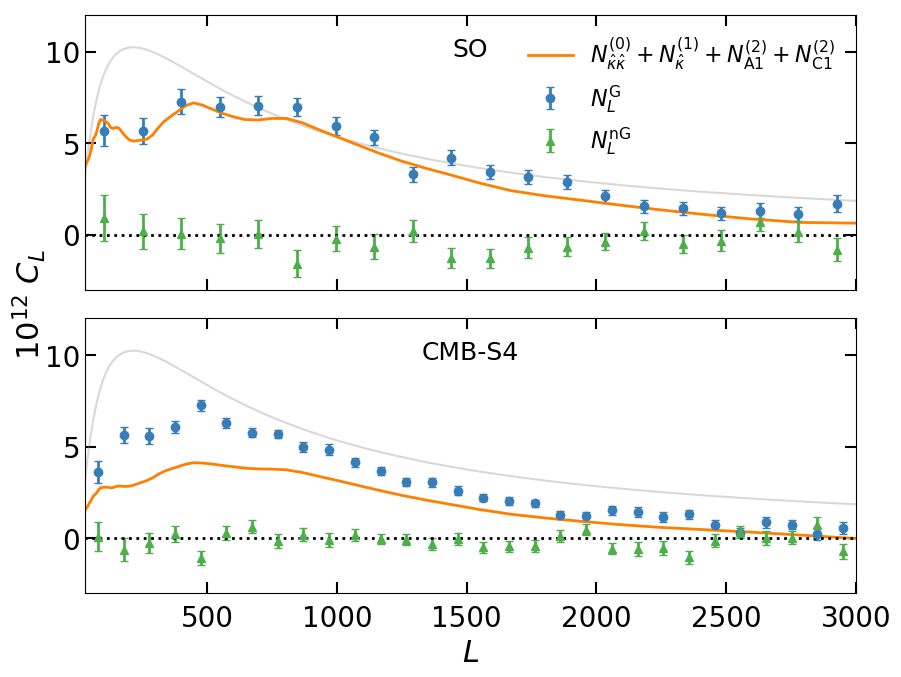

In [36]:
plt.rcParams['figure.figsize'] = [8, 6]
fig, ax = plt.subplots(2,1)
fig.tight_layout(pad=-.5)

scale_fac = 1e12

# ax[1].plot(Cl_ww_true_smooth*scale_fac, color="grey", alpha=0.3)
ax[1].plot(np.arange(5001), Cl_ww_fid_true_*scale_fac, color="grey", alpha=0.3)
ax[1].errorbar(bins, ps_gauss4*scale_fac, err_gauss4*scale_fac, linestyle="", marker=".", label="$N^{\textrm{G}}_L$", markersize=12, elinewidth=2, capsize=3)
ax[1].plot(Ls_S4_N2, (N_S4_N2+N0_S4+N1_S4)*scale_fac, label=r'$N^{(0)}_{\hat{\kappa}\hat{\kappa}}+N^{(1)}_{\hat{\kappa}}+N^{(2)}_{\mathrm{A1}}+N^{(2)}_{\mathrm{C1}}$', linewidth=2)
ax[1].errorbar(bins, ps_non_gauss4*scale_fac, err_non_gauss4*scale_fac, linestyle="", marker="^", label="$N^{\textrm{nG}}_L$", markersize=6, elinewidth=2, capsize=3)
ax[1].plot([0,5000],[0,0], color="k", linewidth=2, linestyle=":")
# ax[1].legend(prop={'size': 16}, frameon=False, ncol=1)
anchored_text = AnchoredText("CMB-S4", loc=9, frameon=False, prop={'size': 18})
ax[1].add_artist(anchored_text)

ax[1].yaxis.get_offset_text().set_fontsize(16)
# ax[1].set_ylabel("$N^{\mathrm{tem}}_{L}(\phi)$", fontsize=22)
ax[1].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[1].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[1].tick_params(labelsize=20)
ax[1].set_ylim(-3, 12)
ax[1].set_xlim(30, 3000)
ax[1].set_xlabel("$L$", fontsize=22)


# ax[0].plot(Cl_ww_true_smooth*scale_fac, color="grey", alpha=0.3)
ax[0].plot(np.arange(5001), Cl_ww_fid_true_*scale_fac, color="grey", alpha=0.3)
ax[0].errorbar(bins_so, ps_gauss*scale_fac, err_gauss*scale_fac, linestyle="", marker=".", label="$N^{\mathrm{G}}_L$", markersize=12, elinewidth=2, capsize=3)
ax[0].plot(Ls_SO_N2, (N_SO_N2+N0_SO+N1_SO)*scale_fac, linewidth=2, label=r'$N^{(0)}_{\hat{\kappa}\hat{\kappa}}+N^{(1)}_{\hat{\kappa}}+N^{(2)}_{\mathrm{A1}}+N^{(2)}_{\mathrm{C1}}$')
ax[0].errorbar(bins_so, ps_non_gauss*scale_fac, err_non_gauss*scale_fac, linestyle="", marker="^", label="$N^{\mathrm{nG}}_L$", markersize=6, elinewidth=2, capsize=3)
ax[0].plot([0,5000],[0,0], color="k", linewidth=2, linestyle=":")

anchored_text = AnchoredText("SO", loc=9, frameon=False, prop={'size': 18})
ax[0].add_artist(anchored_text)

ax[0].legend(prop={'size': 16}, frameon=False, ncol=1)
ax[0].yaxis.get_offset_text().set_fontsize(16)
ax[0].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[0].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[0].tick_params(labelsize=20)
ax[0].set_ylim(-3, 12)
ax[0].set_xlim(30, 3000)
ax[0].tick_params(labelbottom=False)


fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.ylabel(r"$10^{12}$ $C_{L}$", fontsize=22)


# fig.savefig("_plots/phi_bias_long.pdf", bbox_inches='tight')


In [37]:
F_L = np.load("../cache/_F_L_new/kgI/SO_goal/gmv/TEB/30_3000/1_2000/F_L.npy")
Ls = np.load("../cache/_F_L_new/kgI/SO_goal/gmv/TEB/30_3000/1_2000/Ls.npy")
F_L_spline = InterpolatedUnivariateSpline(Ls, F_L)

F_L_s4 = np.load("../cache/_F_L_new/kgI/S4_base/gmv/TEB/30_3000/1_2000/F_L.npy")
Ls = np.load("../cache/_F_L_new/kgI/S4_base/gmv/TEB/30_3000/1_2000/Ls.npy")
F_L_s4_spline = InterpolatedUnivariateSpline(Ls, F_L_s4)

print(F_L[:10])
print(F_L_s4[:10])

C_ww = Cl_ww_fid_true_
C_ww_spline = InterpolatedUnivariateSpline(np.arange(np.size(C_ww)), C_ww)

from omegaqe.noise import Noise
noise = Noise(cosmology=dm.cosmo)
N_ww = noise.get_N0("omega", 5000, "SO_goal", "TEB", True, recalc_N0=True)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(np.size(N_ww))[2:], N_ww[2:])
N_ww_s4 = noise.get_N0("omega", 5000, "S4_base", "TEB", True, recalc_N0=True)
N_ww_s4_spline = InterpolatedUnivariateSpline(np.arange(np.size(N_ww_s4))[2:], N_ww_s4[2:])

fsky=0.4

Ls_sig = np.linspace(30,3000,30)
# Ls_sig = np.geomspace(30,4000,20)
print(f"L bins: {Ls_sig}")
Ls_sig_big = Ls_sig
Ls_sig_big = np.append(Ls_sig_big, Ls_sig[-1]+(Ls_sig[-1]-Ls_sig[-2]))
Ls_sig_big = np.append([Ls_sig[0]-(Ls_sig[1]-Ls_sig[0])], Ls_sig_big)
# ns = [(Ls_sig_big[iii]-Ls_sig_big[iii])/2 + (Ls_sig_big[iii+1]-Ls_sig_big[iii-1])/2 for iii in range(1, np.size(Ls_sig)+1)]
ns = Ls_sig

sig2 = C_ww_spline(Ls_sig)*N_ww_spline(Ls_sig)/F_L_spline(Ls_sig)/(2*(Ls_sig +1))/fsky
err = np.sqrt(sig2/ns)
# err = np.sqrt(sig2)
err_spline = InterpolatedUnivariateSpline(Ls_sig,err)

Ls_sig = np.linspace(30,3000,20)
# Ls_sig = np.geomspace(30,4000,20)
print(f"L bins: {Ls_sig}")
Ls_sig_big = Ls_sig
Ls_sig_big = np.append(Ls_sig_big, Ls_sig[-1]+(Ls_sig[-1]-Ls_sig[-2]))
Ls_sig_big = np.append([Ls_sig[0]-(Ls_sig[1]-Ls_sig[0])], Ls_sig_big)
# ns = [(Ls_sig_big[iii]-Ls_sig_big[iii])/2 + (Ls_sig_big[iii+1]-Ls_sig_big[iii-1])/2 for iii in range(1, np.size(Ls_sig)+1)]
ns = Ls_sig

sig2_s4 = C_ww_spline(Ls_sig)*N_ww_s4_spline(Ls_sig)/F_L_s4_spline(Ls_sig)/(2*(Ls_sig +1))/fsky
err_s4 = np.sqrt(sig2_s4/ns)
# err_s4 = np.sqrt(sig2_s4)
err_s4_spline = InterpolatedUnivariateSpline(Ls_sig,err_s4)


[0.28858059 0.29704704 0.30614532 0.31537871 0.32469217 0.33399009
 0.3431993  0.3522785  0.36124786 0.37003477]
[0.31761653 0.32708549 0.3372606  0.34759657 0.35803426 0.36846592
 0.37881283 0.38903058 0.39913839 0.40905821]
Getting cached N0 for exp: SO_goal, qe: TEB, gmv: True, ps: gradient, L_cuts: (30, 3000, 30, 5000), iter: False, iter_ext: False, data_dir: /mnt/lustre/users/astro/mr671/omegaQE/omegaqe/../fullsky_sims/data
Getting cached N0 for exp: S4_base, qe: TEB, gmv: True, ps: gradient, L_cuts: (30, 3000, 30, 5000), iter: False, iter_ext: False, data_dir: /mnt/lustre/users/astro/mr671/omegaQE/omegaqe/../fullsky_sims/data
L bins: [  30.          132.4137931   234.82758621  337.24137931  439.65517241
  542.06896552  644.48275862  746.89655172  849.31034483  951.72413793
 1054.13793103 1156.55172414 1258.96551724 1361.37931034 1463.79310345
 1566.20689655 1668.62068966 1771.03448276 1873.44827586 1975.86206897
 2078.27586207 2180.68965517 2283.10344828 2385.51724138 2487.931034

Text(62.597222222222214, 0.5, '$\\Delta C_{L}$ ')

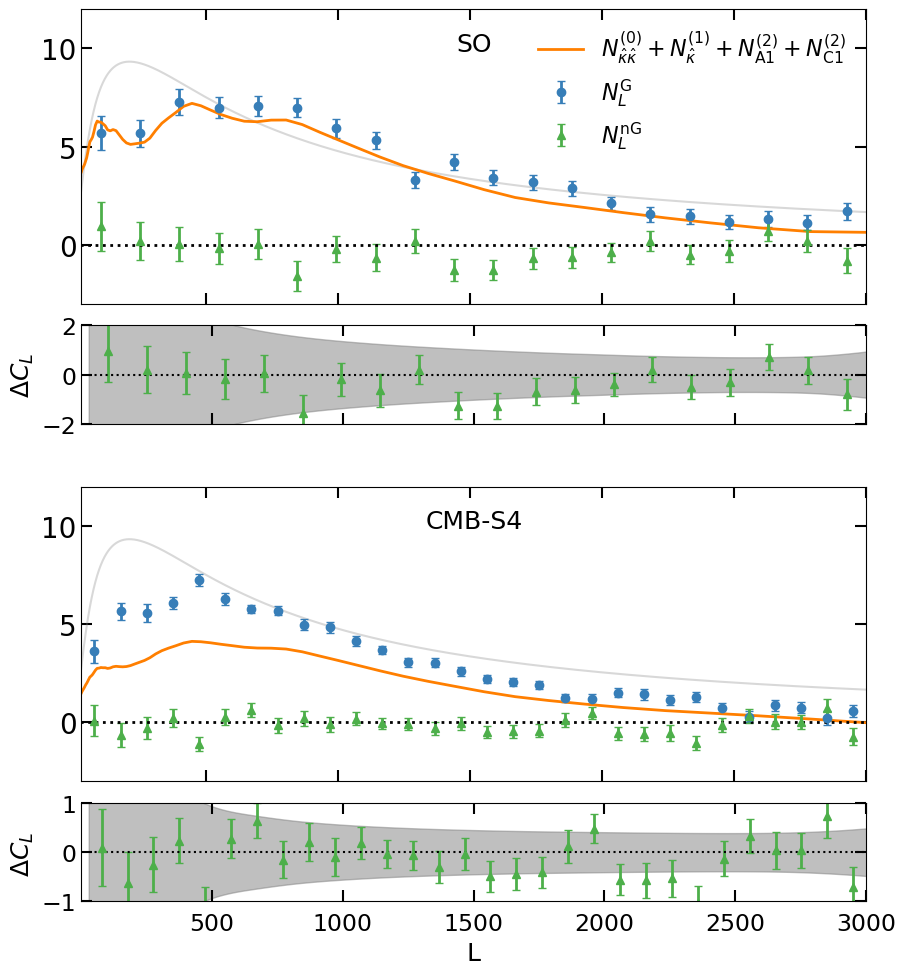

In [38]:
plt.rcParams['figure.figsize'] = [8, 9]
fig, ax = plt.subplots(5,1, gridspec_kw={'height_ratios': [3,1,0.2,3,1]})
fig.tight_layout(pad=-1)

ax[2].remove()

scale_fac = 1e12

# ax[0].plot(Cl_ww_true_smooth*scale_fac, color="grey", alpha=0.3)
ax[0].plot(omega_ps_fid_spline(np.arange(5001))*scale_fac, color="grey", alpha=0.3)
ax[0].errorbar(bins_so, ps_gauss*scale_fac, err_gauss*scale_fac, linestyle="", marker=".", label="$N^{\mathrm{G}}_L$", markersize=12, elinewidth=2, capsize=3)
ax[0].plot(Ls_SO_N2, (N_SO_N2+N0_SO+N1_SO)*scale_fac, linewidth=2, label=r'$N^{(0)}_{\hat{\kappa}\hat{\kappa}}+N^{(1)}_{\hat{\kappa}}+N^{(2)}_{\mathrm{A1}}+N^{(2)}_{\mathrm{C1}}$')
ax[0].errorbar(bins_so, ps_non_gauss*scale_fac, err_non_gauss*scale_fac, linestyle="", marker="^", label="$N^{\mathrm{nG}}_L$", markersize=6, elinewidth=2, capsize=3)
ax[0].plot([0,5000],[0,0], color="k", linewidth=2, linestyle=":")

anchored_text = AnchoredText("SO", loc=9, frameon=False, prop={'size': 18})
ax[0].add_artist(anchored_text)

ax[0].legend(prop={'size': 16}, frameon=False, ncol=1)
ax[0].yaxis.get_offset_text().set_fontsize(16)
ax[0].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[0].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[0].tick_params(labelsize=20)
ax[0].set_ylim(-3, 12)
ax[0].set_xlim(30, 3000)
ax[0].tick_params(labelbottom=False)


ax[1].errorbar(bins_so, ps_non_gauss*scale_fac, err_non_gauss*scale_fac, linestyle="", marker="^", label="$N^{\mathrm{nG}}_L$", markersize=6, elinewidth=2, capsize=3, color='#4daf4a')

Ls = np.arange(30,3001)
SO_fill = ax[1].fill_between(Ls, err_spline(Ls)*scale_fac,-err_spline(Ls)*scale_fac, color="gray", alpha=0.5)
ax[1].plot([30,3000],[0,0], color="k", linestyle=":")
ax[1].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[1].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[1].tick_params(labelbottom=False)
ax[1].set_xlim(2, 3000)
# ax[1].set_ylim(-100,100)
ax[1].set_ylim(-2,2)
ax[1].tick_params(labelsize=17)
ax[1].set_ylabel("$\Delta C_{L}$", fontsize=18)


# ax[3].plot(Cl_ww_true_smooth*scale_fac, color="grey", alpha=0.3)
ax[3].plot(omega_ps_fid_spline(np.arange(5001))*scale_fac, color="grey", alpha=0.3)
ax[3].errorbar(bins, ps_gauss4*scale_fac, err_gauss4*scale_fac, linestyle="", marker=".", label="$N^{\textrm{G}}_L$", markersize=12, elinewidth=2, capsize=3)
ax[3].plot(Ls_S4_N2, (N_S4_N2+N0_S4+N1_S4)*scale_fac, label=r'$N^{(0)}_{\hat{\kappa}\hat{\kappa}}+N^{(1)}_{\hat{\kappa}}+N^{(2)}_{\mathrm{A1}}+N^{(2)}_{\mathrm{C1}}$', linewidth=2)
ax[3].errorbar(bins, ps_non_gauss4*scale_fac, err_non_gauss4*scale_fac, linestyle="", marker="^", label="$N^{\textrm{nG}}_L$", markersize=6, elinewidth=2, capsize=3)
ax[3].plot([0,5000],[0,0], color="k", linewidth=2, linestyle=":")
# ax[3].legend(prop={'size': 16}, frameon=False, ncol=1)
anchored_text = AnchoredText("CMB-S4", loc=9, frameon=False, prop={'size': 18})
ax[3].add_artist(anchored_text)

ax[3].yaxis.get_offset_text().set_fontsize(16)
# ax[3].set_ylabel("$N^{\mathrm{tem}}_{L}(\phi)$", fontsize=22)
ax[3].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[3].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[3].tick_params(labelsize=20)
ax[3].set_ylim(-3, 12)
ax[3].set_xlim(30, 3000)
ax[3].tick_params(labelbottom=False)
# ax[3].set_xlabel("$L$", fontsize=22)


ax[4].errorbar(bins, ps_non_gauss4*scale_fac, err_non_gauss4*scale_fac, linestyle="", marker="^", label="$N^{\mathrm{nG}}_L$", markersize=6, elinewidth=2, capsize=3, color='#4daf4a')

S4_fill = ax[4].fill_between(Ls, err_s4_spline(Ls)*scale_fac,-err_s4_spline(Ls)*scale_fac, color="gray", alpha=0.5)
ax[4].plot([30,3000],[0,0], color="k", linestyle=":")
ax[4].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[4].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[4].set_xlim(2, 3000)
ax[4].set_ylim(-1,1)
ax[4].tick_params(labelsize=17)
ax[4].set_xlabel("L", fontsize=18)
ax[4].set_ylabel("$\Delta C_{L}$ ", fontsize=18)


Text(62.597222222222214, 0.5, '$10^{12}$ $\\Delta C_{L}$ ')

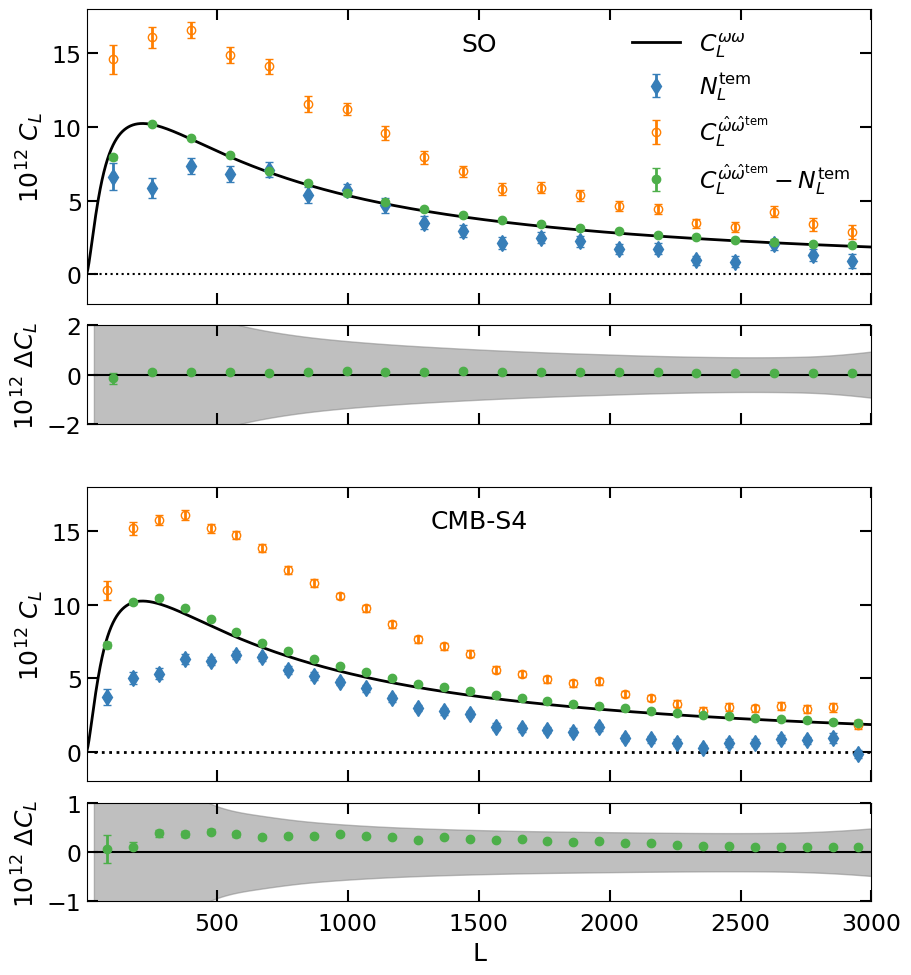

In [39]:
plt.rcParams['figure.figsize'] = [8, 9]
fig, ax = plt.subplots(5,1, gridspec_kw={'height_ratios': [3,1,0.2,3,1]})
fig.tight_layout(pad=-1)

ax[2].remove()

Cl_ww_fid_true = np.load("../cache/_C_omega/C_omega.npy")
my_ells = np.load("../cache/_C_omega/Ls.npy")
Cl_ww_fid_spline = InterpolatedUnivariateSpline(my_ells, Cl_ww_fid_true)

ax[0].plot(np.arange(5001), Cl_ww_fid_spline(np.arange(5001))*scale_fac, color="k", label="$C^{\omega\omega}_L$", linewidth=2)
ax[0].errorbar(bins_so, ps_pb_*scale_fac, err_pb_*scale_fac, linestyle="", marker="d", markersize=8, elinewidth=2, capsize=3, label="$N^{\mathrm{tem}}_L$")
ax[0].errorbar(bins_so, ps_pb_dem*scale_fac, err_pb_dem*scale_fac, linestyle="", marker="o", markersize=6, elinewidth=2, capsize=3, mfc='none', label="$C^{\hat{\omega}\hat{\omega}^{\mathrm{tem}}}_L$")
ax[0].errorbar(bins_so, ps_signal*scale_fac, err_signal*scale_fac, linestyle="", marker=".", markersize=12, elinewidth=2, capsize=3, label="$C^{\hat{\omega}\hat{\omega}^{\mathrm{tem}}}_L-N^{\mathrm{tem}}_L$")
anchored_text = AnchoredText("SO", loc=9, frameon=False, prop={'size': 18})
ax[0].add_artist(anchored_text)



ax[0].plot([30,3000],[0,0], color="k", linestyle=":")
ax[0].yaxis.get_offset_text().set_fontsize(11)
ax[0].tick_params(labelbottom=False)
ax[0].legend(prop={'size': 17}, frameon=False, ncol=1)
ax[0].set_ylabel(r"$10^{12}$ $C_{L}$", fontsize=18)
ax[0].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[0].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[0].tick_params(labelsize=17)
ax[0].set_ylim(-2, 18)
ax[0].set_xlim(2, 3000)
ax[0].tick_params(labelbottom=False)

cl_fid_bin_so, _, err_so = dm.sht.bin_cl(Cl_ww_fid_spline(np.arange(30,3001)), nbins=20)


ax[1].errorbar(bins_so, (ps_signal - cl_fid_bin_so)*scale_fac, np.sqrt(err_signal**2+err_so**2)*scale_fac, linestyle="", marker=".", color='#4daf4a', markersize=12, elinewidth=2, capsize=3)

Ls = np.arange(30,3001)
SO_fill = ax[1].fill_between(Ls, err_spline(Ls)*scale_fac,-err_spline(Ls)*scale_fac, color="gray", alpha=0.5)
# ax[1].plot(omega_Ls_fid, (omega_ps_fid - cl_w_sm_spline(omega_Ls_fid)), linestyle=":", color="k", linewidth=2)
ax[1].plot([30,3000],[0,0], color="k", linestyle="-")
ax[1].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[1].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[1].tick_params(labelbottom=False)
ax[1].set_xlim(2, 3000)
# ax[1].set_ylim(-100,100)
ax[1].set_ylim(-2,2)
ax[1].tick_params(labelsize=17)
ax[1].set_ylabel("$10^{12}$ $\Delta C_{L}$", fontsize=18)



# ax[3].plot(Cl_ww_true_smooth*scale_fac, color="k", label="True signal", linewidth=2)
ax[3].plot(np.arange(5001), C_ww_spline(np.arange(5001))*scale_fac, color="k", label="$C^{\omega\omega}_L$", linewidth=2)
ax[3].errorbar(bins, ps_pb_4*scale_fac, err_pb_4*scale_fac, linestyle="", marker="d", markersize=8, elinewidth=2, capsize=3)
ax[3].errorbar(bins, ps_pb_dem4*scale_fac, err_pb_dem4*scale_fac, linestyle="", marker="o", markersize=6, elinewidth=2, capsize=3, mfc='none')
ax[3].errorbar(bins, ps_signal_4*scale_fac, err_signal_4*scale_fac, linestyle="", marker=".", markersize=12, elinewidth=2, capsize=3)
anchored_text = AnchoredText("CMB-S4", loc=9, frameon=False, prop={'size': 18})
ax[3].add_artist(anchored_text)
# S4_fill = ax[3].fill_between(Ls, (err_s4_spline(Ls)+C_ww_spline(Ls))*scale_fac,(-err_s4_spline(Ls)+C_ww_spline(Ls))*scale_fac, color="gray", alpha=0.5)


ax[3].plot([30,3000],[0,0], color="k", linestyle=":", linewidth=2)

ax[3].yaxis.get_offset_text().set_fontsize(11)
ax[3].tick_params(labelbottom=False)
ax[3].set_ylabel(r"$10^{12}$ $C_{L}$", fontsize=18)
ax[3].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[3].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[3].tick_params(labelsize=17)
ax[3].set_ylim(-2, 18)
ax[3].set_xlim(2, 3000)

Cl_ww_fid_true = np.load("../cache/_C_omega/C_omega.npy")
my_ells = np.load("../cache/_C_omega/Ls.npy")
Cl_ww_fid_spline = InterpolatedUnivariateSpline(my_ells, Cl_ww_fid_true)
cl_fid_bin, _, err = dm.sht.bin_cl(Cl_ww_fid_spline(np.arange(30,3001)), nbins=30)

ax[4].errorbar(bins, (ps_signal_4 - cl_fid_bin)*scale_fac, np.sqrt(err_signal_4**2+err**2)*scale_fac, linestyle="", marker=".", color='#4daf4a', markersize=12, elinewidth=2, capsize=3)

S4_fill = ax[4].fill_between(Ls, err_s4_spline(Ls)*scale_fac,-err_s4_spline(Ls)*scale_fac, color="gray", alpha=0.5)
ax[4].plot([30,3000],[0,0], color="k", linestyle="-")
ax[4].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[4].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[4].set_xlim(2, 3000)
# ax[4].set_ylim(-30,30)
ax[4].set_ylim(-1,1)
ax[4].tick_params(labelsize=17)
ax[4].set_xlabel("L", fontsize=18)
ax[4].set_ylabel("$10^{12}$ $\Delta C_{L}$ ", fontsize=18)


# fig.savefig("_plots/sig_minus_bias_long.pdf", bbox_inches='tight')


In [3]:
from fullsky_sims.agora import Agora
from omegaqe.noise import Noise

ag = Agora(nthreads=20)
noise = Noise()

Setting up cosmology with CAMB ini file at /mnt/lustre/users/astro/mr671/omegaQE/omegaqe/../fullsky_sims/data/CAMB/AGORA_params.ini
Setting up cosmology with CAMB ini file at /mnt/lustre/users/astro/mr671/omegaQE/omegaqe/../fullsky_sims/data/CAMB/DEMNUnii_params.ini


In [4]:
# SO noise params (1808.07445)
freqs = [95, 150, 220]
beams = [2.2,1.4,1.0]
n_lev_base = [8.0,10.0,22.0]
n_lev_goal = [5.8, 6.3, 15]
P_ell_knee = 700
P_alpha = -1.4
T_ell_knee = 1000
T_alpha = -3.5

# SO Nred calc (1808.07445)
N_years = 5
years_to_seconds = 365.25 * 86400
observing_efficiency = 0.2 * 0.85  # Observing for 1/5th available days and only using 85% of available map
fsky = 0.4   # Required to convert to units
conversion_fac = (fsky * 4 * np.pi)/(N_years * years_to_seconds * observing_efficiency)
Nred_Ts = np.array([230, 1500, 17000]) * conversion_fac


def _get_N_white(beam, n_lev):
    T_cmb = 2.7255 
    return noise.get_cmb_gaussian_N("TT", deltaT=n_lev, beam=beam, ellmax=ag.Lmax_map)*(1e6*T_cmb)**2

def _noise_cl(N_red, ell_knee, alpha, beam, n_lev):
    ells = np.arange(ag.Lmax_map + 1)
    N_white = _get_N_white(beam, n_lev)
    if N_red is None:
        N_red = N_white
    else:
        arcmin_to_radians = np.pi/180/60
        beam *= arcmin_to_radians
        N_red *= np.exp(ells*(ells+1)*beam**2/(8*np.log(2)))
    return N_red*(ells/ell_knee)**alpha + N_white

def _noise_cls(exp):
    scaling = 1
    if exp == "SO_base":
        n_lev_array = n_lev_base
    elif exp == "SO_goal":
        n_lev_array = n_lev_goal
    elif exp == "S4_base":
        n_lev_array = n_lev_goal
        scaling = 0.1    # Assuming S4 is factor of 10 better than SO goal
    else:
        raise ValueError(f"Argument exp: {exp} not expected. Try SO_base or SO_goal or S4_base.")
    N_Ts = np.empty((3, ag.Lmax_map + 1))
    N_Ps = np.empty((3, ag.Lmax_map + 1))
    for iii, nu in enumerate(freqs):
        N_Ts[iii,:] = _noise_cl(Nred_Ts[iii], T_ell_knee, T_alpha, beams[iii], n_lev_array[iii])
        N_Ps[iii,:] = _noise_cl(None, P_ell_knee, P_alpha, beams[iii], n_lev_array[iii]*np.sqrt(2))
    return N_Ts * scaling, N_Ps * scaling

In [5]:
cib_95 = ag.get_obs_cib_map(95, muK=True)
tsz_95 = ag.get_obs_tsz_map(95)
cl_cross_95 = ag.sht.map2cl(cib_95, tsz_95)

In [6]:
cib_150 = ag.get_obs_cib_map(150, muK=True)
tsz_150 = ag.get_obs_tsz_map(150)
cl_cross_150 = ag.sht.map2cl(cib_150, tsz_150)

In [7]:
cib_220 = ag.get_obs_cib_map(220, muK=True)
tsz_220 = ag.get_obs_tsz_map(220)
cl_cross_220 = ag.sht.map2cl(cib_220, tsz_220)

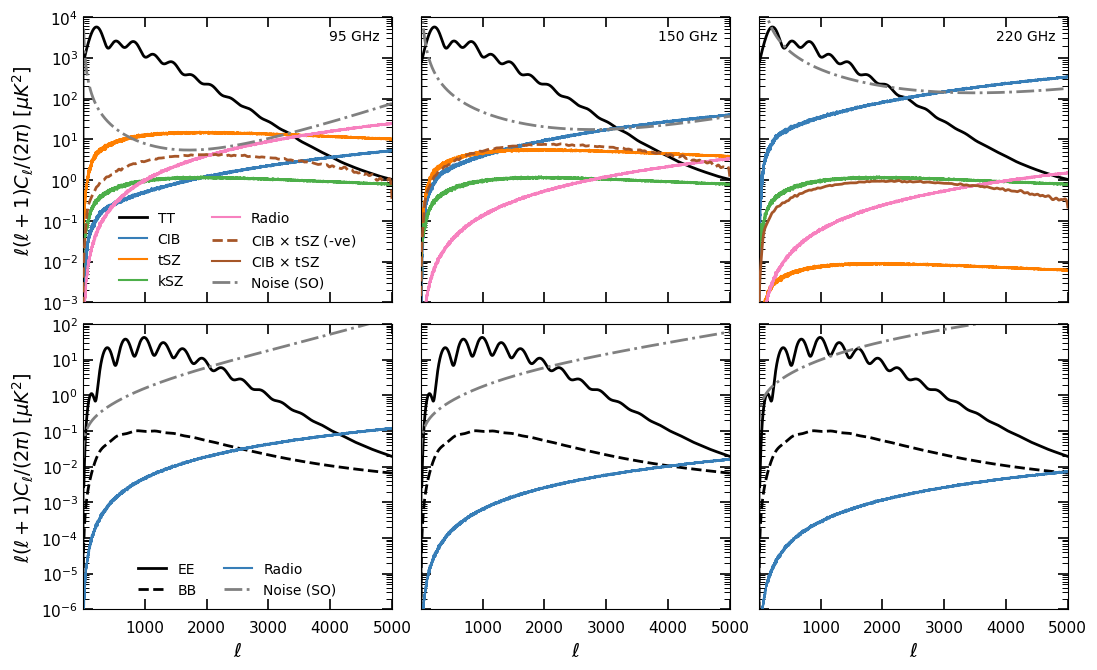

In [8]:
plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots(2,3)
fig.tight_layout(pad=-1)

freqs = [95,150,220]

cl_tt = ag.cosmo.get_lens_ps("TT")[:5001]*2.7255**2*1e12
cl_ee = ag.cosmo.get_lens_ps("EE")[:5001]*2.7255**2*1e12
cl_bb = ag.cosmo.get_lens_ps("BB")[:5001]*2.7255**2*1e12

ells = np.arange(5001)

N_T, N_P = _noise_cls("SO_goal")
N_T_s4, N_P_s4 = _noise_cls("S4_base")
      
for col, freq in enumerate(freqs):
    ax[0][col].plot(ells, ells*(ells+1)*cl_tt/(2*np.pi), label="TT", color="k", linewidth=2)

    cl_cib = np.load(f"{ag.cache_dir}/_fg_cls_new/{freq}/cib.npy")
    ax[0][col].semilogy(ells, ells*(ells+1)*cl_cib/(2*np.pi), label="CIB")
    
    cl_tsz = np.load(f"{ag.cache_dir}/_fg_cls_new/{freq}/tsz.npy")
    ax[0][col].semilogy(ells, ells*(ells+1)*cl_tsz/(2*np.pi), label="tSZ")

    cl_ksz = np.load(f"{ag.cache_dir}/_fg_cls_new/{freq}/ksz.npy")
    ax[0][col].semilogy(ells, ells*(ells+1)*cl_ksz/(2*np.pi), label="kSZ")
    
    cl_rad = np.load(f"{ag.cache_dir}/_fg_cls_new/{freq}/rad_T.npy")
    ax[0][col].semilogy(ells, ells*(ells+1)*cl_rad/(2*np.pi), label="Radio")

    
    
    if col == 0:
        ax[0][col].semilogy(ells, ag.sht.smoothed_cl(np.abs(ells*(ells+1)*cl_cross_95),150), label=r"CIB $\times$ tSZ (-ve)", zorder=1000, linewidth=2, linestyle="--")
        ax[0][col].semilogy(0, 0, label=r"CIB $\times$ tSZ", color='#a65628')
        
    if col == 1:
        ax[0][col].semilogy(ells, ag.sht.smoothed_cl(np.abs(ells*(ells+1)*cl_cross_150),150), label="CIBxtSZ (-ve)", zorder=1000, linewidth=2, linestyle="--")
        # ax[0][col].semilogy(ells, -ells*(ells+1)*cl_cross_150, label="CIBxtSZ (-ve)", linestyle="--")
        
    if col == 2:
        ax[0][col].semilogy(ells, ag.sht.smoothed_cl(np.abs(ells*(ells+1)*cl_cross_220),150), label="CIBxtSZ", zorder=1000, linewidth=2)
        # ax[0][col].semilogy(ells, -ells*(ells+1)*cl_cross_220, label="CIBxtSZ (-ve)", linestyle="--")
    
    # N_T = noise.get_cmb_gaussian_N("TT", None, None, exp="SO_goal", ellmax=5000)
    # ax[0][col].semilogy(ells, ells*(ells+1)*N_T*2.7255**2*1e12, label="Noise (SO)", linewidth=2, color="grey", linestyle="-.")
    ax[0][col].semilogy(ells, ells*(ells+1)*N_T[col]/(2*np.pi), label="Noise (SO)", linewidth=2, color="grey", linestyle="-.")
    
    # N_T = noise.get_cmb_gaussian_N("TT", None, None, exp="S4_base", ellmax=5000)
    # ax[0][col].semilogy(ells, ells*(ells+1)*N_T*2.7255**2*1e12, label="Noise (CMB-S4)", linewidth=2, color="grey", linestyle=":")
    # ax[0][col].semilogy(ells, ells*(ells+1)*N_T_s4[col], label="Noise (CMB-S4)", linewidth=2, color="grey", linestyle=":")
    
    anchored_text = AnchoredText(str(freq)+ " GHz", loc=1, frameon=False, prop={'size': 10})
    ax[0][col].add_artist(anchored_text)
    
    ax[0][col].set_xlim(2,5000)
    ax[0][col].set_ylim(1e-3,1e4)
    ax[0][col].tick_params(top=True, right=True, direction="in", which="minor", length=4, width=0.7)
    ax[0][col].tick_params(top=True, right=True, direction="in", which="major", length=7, width=1.2)
    ax[0][col].tick_params(labelsize=11)
    ax[0][col].tick_params(labelbottom=False)
    
for col, freq in enumerate(freqs):
    ax[1][col].semilogy(ells, ells*(ells+1)*cl_ee/(2*np.pi), label="EE", color="k", linewidth=2)
    ax[1][col].semilogy(ells, ells*(ells+1)*cl_bb/(2*np.pi), label="BB", color="k", linewidth=2, linestyle="--")
    
    cl_rad_e = np.load(f"{ag.cache_dir}/_fg_cls_new/{freq}/rad_E.npy")
    cl_rad_b = np.load(f"{ag.cache_dir}/_fg_cls_new/{freq}/rad_B.npy")
    ax[1][col].semilogy(ells, ells*(ells+1)*cl_rad_e, label="Radio")
    # ax[1][col].semilogy(ells, ells*(ells+1)*cl_rad_b, label="Radio (BB)")
    
    # N_E = noise.get_cmb_gaussian_N("EE", None, None, exp="SO_goal", ellmax=5000)
    # ax[1][col].semilogy(ells, ells*(ells+1)*N_E*2.7255**2*1e12, label="Noise (SO)", linewidth=2, color="grey", linestyle="-.")
    ax[1][col].semilogy(ells, ells*(ells+1)*N_P[col]/(2*np.pi), label="Noise (SO)", linewidth=2, color="grey", linestyle="-.")
    
    # N_E = noise.get_cmb_gaussian_N("EE", None, None, exp="S4_base", ellmax=5000)
    # ax[1][col].semilogy(ells, ells*(ells+1)*N_E*2.7255**2*1e12, label="Noise (CMB-S4)", linewidth=2, color="grey", linestyle=":")
    # ax[1][col].semilogy(ells, ells*(ells+1)*N_P_s4[col], label="Noise (CMB-S4)", linewidth=2, color="grey", linestyle=":")
    
    
    
    ax[1][col].set_xlim(2,5000)
    ax[1][col].set_ylim(1e-6,1e2)
    ax[1][col].tick_params(top=True, right=True, direction="in", which="minor", length=4, width=0.7)
    ax[1][col].tick_params(top=True, right=True, direction="in", which="major", length=7, width=1.2)
    ax[1][col].tick_params(labelsize=11)

    
ax[0,0].legend(prop={'size': 10}, frameon=False, ncol=2, loc=8)
ax[1,0].legend(prop={'size': 10}, frameon=False, ncol=2, loc=8)
ax[0,0].set_ylabel("$\ell(\ell+1)C_{\ell}/(2\pi)$ $[\mu K^2]$", fontsize=14)
ax[1,0].set_ylabel("$\ell(\ell+1)C_{\ell}/(2\pi)$ $[\mu K^2]$", fontsize=14)
ax[1,0].set_xlabel("$\ell$", fontsize=14)
ax[1,1].set_xlabel("$\ell$", fontsize=14)
ax[1,2].set_xlabel("$\ell$", fontsize=14)

ax[0][1].tick_params(labelleft=False)
ax[0][2].tick_params(labelleft=False) 
ax[1][1].tick_params(labelleft=False)
ax[1][2].tick_params(labelleft=False) 

# fig.savefig("_plots/fg_cls.pdf", bbox_inches='tight')

In [9]:
def _get_smoothed_weights(exp, typ):
    w = np.load(f"{ag.cache_dir}/_HILC_weights_new/{exp}/weights_95_150_220_{typ}.npy")
    w_shape = np.shape(w)
    w_sm = np.zeros(w_shape)
    for iii in np.arange(w_shape[1]):
        w_sm[1:,iii] = ag.sht.smoothed_cl(w[1:,iii], 100, zerod=False)
    return w_sm

In [10]:
def _get_Tilc(Ts, wT, noise=False):
    T_ilc = None
    for iii, T in enumerate(Ts):
        if noise:
            T_lm = T*wT[:,iii]
        else:
            T_lm = ag.sht.map2alm(T)
            T_lm = ag.sht.almxfl(T_lm, wT[:,iii])
        if T_ilc is None:
            T_ilc = T_lm
        else:
            T_ilc += T_lm
    if noise:
        return T_ilc
    else:
        return ag.sht.alm2map(T_ilc)

In [11]:
# def _get_EBilc(Qs, Us, wE, wB, noise=False):
#     E_ilc = None
#     B_ilc = None
#     for iii, (Q, U) in enumerate(zip(Qs, Us)):
#         if noise:
#             E_lm = Q*wE[:,iii]
#             B_lm = U*wB[:,iii]
#         else:
#             E_lm, B_lm = ag.sht.map2alm_spin((Q, U), 2)
#             E_lm = ag.sht.almxfl(E_lm, wE[:,iii])
#             B_lm = ag.sht.almxfl(B_lm, wB[:,iii])
#         if E_ilc is None:
#             E_ilc = E_lm
#             B_ilc = B_lm
#         else:
#             E_ilc += E_lm
#             B_ilc += B_lm
#     if noise:
#         return E_ilc
#     else:
#         return ag.sht.alm2map_spin((E_ilc, B_ilc), 2)

In [12]:
wT = _get_smoothed_weights("SO_goal", "T")
# wE = _get_smoothed_weights("SO_goal", "E")
# wB = _get_smoothed_weights("SO_goal", "B")

In [13]:
N_T_ilc = _get_Tilc(N_T, wT, noise=True)
N_T_s4_ilc = _get_Tilc(N_T_s4, wT, noise=True)

# N_P_ilc = _get_EBilc(N_P,N_P, wE,wB, noise=True)
# N_P_s4_ilc = _get_EBilc(N_P_s4,N_P_s4, wE,wB, noise=True)

In [14]:
# Q_fg = np.empty((3, ag.sht.nside2npix(ag.nside)))
# U_fg = np.empty((3, ag.sht.nside2npix(ag.nside)))
# for iii, freq in enumerate(freqs):
#     _, Q, U = ag.get_obs_rad_maps(freq, point_mask=True)
#     Q_fg[iii,:] = Q
#     U_fg[iii,:] = U
# Q_ilc, U_ilc = _get_EBilc(Q_fg, U_fg, wE, wB)
# del Q_fg
# del U_fg

In [15]:
cibs = np.empty((3, ag.sht.nside2npix(ag.nside)))
tszs = np.empty((3, ag.sht.nside2npix(ag.nside)))
kszs = np.empty((3, ag.sht.nside2npix(ag.nside)))
rads = np.empty((3, ag.sht.nside2npix(ag.nside)))

# ag.calc_masks(6e-3)

cl_tt = ag.cosmo.get_lens_ps("TT")[:5001]*2.7255**2*1e12
wT = _get_smoothed_weights("SO_goal", "T")
freqs = [95, 150, 220]

for iii, freq in enumerate(freqs):
    cib = ag.get_obs_cib_map(freq, muK=True)
    cibs[iii,:] = cib
cib_ilc = _get_Tilc(cibs, wT)
del cibs
for iii, freq in enumerate(freqs):
    tsz = ag.get_obs_tsz_map(freq)
    tszs[iii,:] = tsz
tsz_ilc = _get_Tilc(tszs, wT)
del tszs
for iii, freq in enumerate(freqs):
    ksz = ag.get_obs_ksz_map()
    kszs[iii,:] = ksz
ksz_ilc = _get_Tilc(kszs, wT)
del kszs
for iii, freq in enumerate(freqs):
    rad = ag.get_obs_rad_map(freq, point_mask=True)
    rads[iii,:] = rad
rad_ilc = _get_Tilc(rads, wT)
del rads





In [16]:
cl_cib_ilc = ag.sht.map2cl(cib_ilc)
cl_tsz_ilc = ag.sht.map2cl(tsz_ilc)
cl_ksz_ilc = ag.sht.map2cl(ksz_ilc)
cl_rad_ilc = ag.sht.map2cl(rad_ilc)

cl_cross_ilc = ag.sht.map2cl(tsz_ilc, cib_ilc)


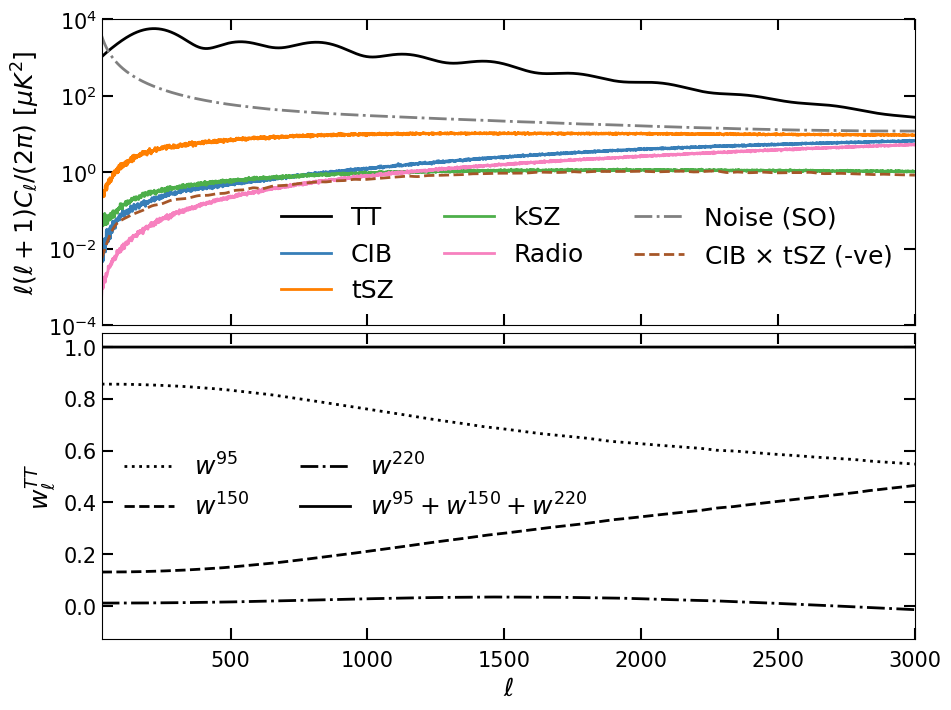

In [18]:
plt.rcParams['figure.figsize'] = [8, 6]
fig, ax = plt.subplots(2,1)
fig.tight_layout(pad=-2)
fac=1e12

ells = np.arange(5001)
ax[0].plot(ells, ells*(ells+1)*cl_tt/(2*np.pi), label="TT", color="k", linewidth=2)
ax[0].semilogy(ells, ells*(ells+1)*cl_cib_ilc/(2*np.pi), linewidth=2, label="CIB")
ax[0].semilogy(ells, ells*(ells+1)*cl_tsz_ilc/(2*np.pi), linewidth=2, label="tSZ")
ax[0].semilogy(ells, ells*(ells+1)*cl_ksz_ilc/(2*np.pi), linewidth=2, label="kSZ")
ax[0].semilogy(ells, ells*(ells+1)*cl_rad_ilc/(2*np.pi), linewidth=2, label="Radio")
ax[0].semilogy(ells, ells*(ells+1)*N_T_ilc/(2*np.pi), linewidth=2, label="Noise (SO)", color="grey", linestyle="-.")
ax[0].semilogy(ells, np.abs(ag.sht.smoothed_cl(ells*(ells+1)*cl_cross_ilc/(2*np.pi),150)), linewidth=2, label=r"CIB $\times$ tSZ (-ve)", linestyle="--")
# ax[0].semilogy(ells, np.abs(ells*(ells+1)*cl_cross_ilc/(2*np.pi)), linewidth=2, label=r"CIB $\times$ tSZ", zorder=1)
# ax[0].semilogy(ells, np.abs(ag.sht.smoothed_cl(ells*(ells+1)*cl_cross2_ilc/(2*np.pi),150)), linewidth=2, label=r"kSZ $\times$ tSZ (-ve)", linestyle="--")


ax[0].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[0].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[0].tick_params(labelsize=15)
ax[0].set_xlim(30,3000)
ax[0].set_ylim(1e-4,1e4)
ax[0].set_ylabel("$\ell(\ell+1)C_{\ell}/(2\pi)$ $[\mu K^2]$", fontsize=18)
ax[0].tick_params(labelbottom=False)
ax[0].legend(prop={'size': 18}, frameon=False, ncol=3)

wT = np.load("../cache_ag/_HILC_weights_new/SO_goal/weights_95_150_220_T.npy")
wT[0,0]  = wT[1,0]
wT[0,1]  = wT[1,1]
wT[0,2]  = wT[1,2]

wT0_sm = ag.sht.smoothed_cl(wT[:,0], 100, zerod=False)
wT1_sm = ag.sht.smoothed_cl(wT[:,1], 100, zerod=False)
wT2_sm = ag.sht.smoothed_cl(wT[:,2], 100, zerod=False)
# ax[1].plot(wT[:,0], label="95")
ax[1].plot(wT0_sm, label="$w^{95}$", color="k", linestyle=":", linewidth=2)
# ax[1].plot(wT[:,1], label="150")
ax[1].plot(wT1_sm, label="$w^{150}$", color="k", linestyle="--", linewidth=2)
# ax[1].plot(wT[:,2], label="220")
ax[1].plot(wT2_sm, label="$w^{220}$", color="k", linestyle="-.", linewidth=2)
ax[1].plot(wT0_sm+wT1_sm+wT2_sm, color="k", label="$w^{95}+w^{150}+w^{220}$", linewidth=2)

ax[1].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[1].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[1].tick_params(labelsize=15)
# ax[1].set_ylim(-7, 10)
ax[1].set_ylabel("$w^{TT}_{\ell}$", fontsize=18)
ax[1].set_xlabel("$\ell$", fontsize=18)
ax[1].set_xlim(30, 3000)
ax[1].legend(prop={'size': 18}, frameon=False, ncol=2)

# fig.savefig("_plots/hilc_w.pdf", bbox_inches='tight')


In [20]:
cl_omega_fid = np.load("../cache_ag/_C_omega/C_omega.npy")
ls_omega = np.load("../cache_ag/_C_omega/Ls.npy")

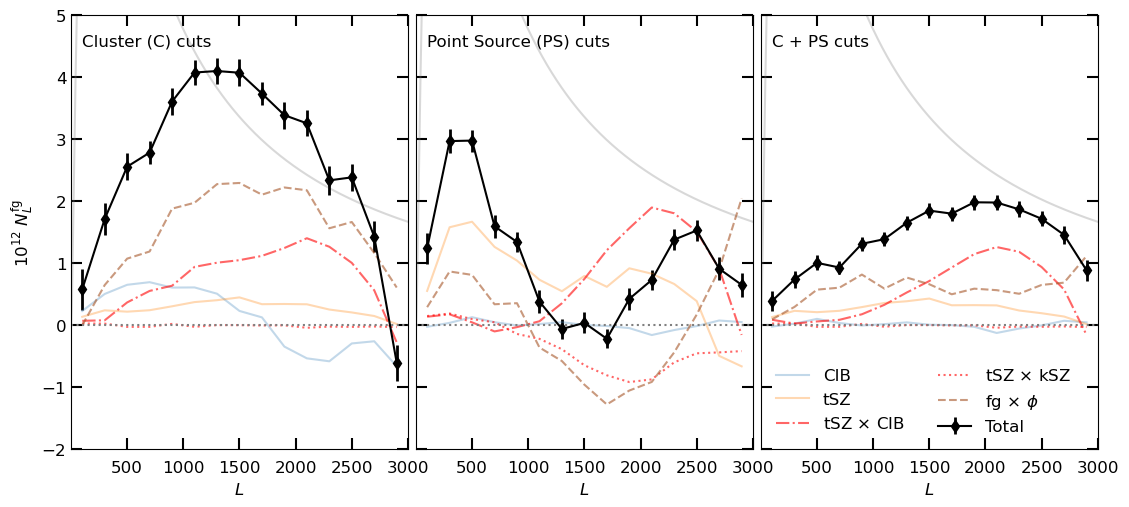

In [21]:
plt.rcParams['figure.figsize'] = [10, 4]

Nplots = 3
fig, ax = plt.subplots(1,Nplots)
fig.tight_layout(pad=-2.5)

fac=1e12

nbins=15

labels = ["Cluster (C) cuts", "Point Source (PS) cuts", "C + PS cuts"]
strs = ["_cm/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy", "_pm/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy", "_pm_cm/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy"]
linewidth=1.5

for plot in np.arange(Nplots):

    ax[plot].plot(ls_omega, cl_omega_fid*fac, color="grey", alpha=0.3, linewidth=linewidth)

    # anchored_text = AnchoredText(labels[plot], loc=1, frameon=False, prop={'size': 12})
    # ax[plot].add_artist(anchored_text)
    ax[plot].text(100, 4.5, labels[plot], fontsize=12)


    cl_tot = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_tsz_ksz_cib_rad{strs[plot]}")
    cl_N0len = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC{strs[plot]}")
    cl_bin, bins, err = ag.sht.bin_cl((cl_tot-cl_N0len)[:3001], nbins)
    ax[plot].errorbar(bins, cl_bin*fac, err*fac, label=r"Total", marker="d", markersize=6, elinewidth=2, alpha=1, linewidth=linewidth, color="k")
    # ax[plot].plot(bins, cl_bin*fac, label=r"Total", alpha=1, linewidth=2, color="k")



    cl_I = np.load(f"../cache_ag/_raw_ps/unlensed/HILC_cib{strs[plot]}")
    cl_N0 = np.load(f"../cache_ag/_raw_ps/unlensed/HILC{strs[plot]}")
    cl_bin, bins, err = ag.sht.bin_cl((cl_I-cl_N0)[:3001], nbins)
    # ax[plot].errorbar(bins, cl_bin*fac, err*fac, label=r"I cm$", marker=".", mfc='none', markersize=8, elinewidth=2, linestyle="--", alpha=1, linewidth=2)
    ax[plot].plot(bins, cl_bin*fac, label=r"CIB", linestyle="-", alpha=0.3, linewidth=linewidth)


    cl_t = np.load(f"../cache_ag/_raw_ps/unlensed/HILC_tsz{strs[plot]}")
    cl_N0 = np.load(f"../cache_ag/_raw_ps/unlensed/HILC{strs[plot]}")
    cl_bin, bins, err = ag.sht.bin_cl((cl_t-cl_N0)[:3001], nbins)
    # ax[plot].errorbar(bins, cl_bin*fac, err*fac, label=r"t cm$", marker=".", mfc='none', markersize=8, elinewidth=2, linestyle="--", alpha=1, linewidth=2)
    ax[plot].plot(bins, cl_bin*fac, label=r"tSZ", linestyle="-", alpha=0.3, linewidth=linewidth)


    cl_k = np.load(f"../cache_ag/_raw_ps/unlensed/HILC_ksz{strs[plot]}")
    cl_N0 = np.load(f"../cache_ag/_raw_ps/unlensed/HILC{strs[plot]}")
    cl_bin, bins, err = ag.sht.bin_cl((cl_k-cl_N0)[:3001], nbins)
    # ax[plot].errorbar(bins, cl_bin*fac, err*fac, label=r"k cm$", marker=".", mfc='none', markersize=8, elinewidth=2, linestyle="--", alpha=1, linewidth=2)
    # ax[plot].plot(bins, cl_bin*fac, label=r"k cm$", linestyle="-", alpha=0.3, linewidth=linewidth)


    cl_tI = np.load(f"../cache_ag/_raw_ps/unlensed/HILC_tsz_cib{strs[plot]}")
    cl_N0 = np.load(f"../cache_ag/_raw_ps/unlensed/HILC{strs[plot]}")
    cl_bin, bins, err = ag.sht.bin_cl((cl_tI-(cl_t-cl_N0)-(cl_I-cl_N0)-cl_N0)[:3001], nbins)
    # ax[plot].errorbar(bins, cl_bin*fac, err*fac, label=r"txI cm$", marker="x", mfc='none', markersize=8, elinewidth=2, linestyle="-.", alpha=1, linewidth=2, color="red")
    ax[plot].plot(bins, cl_bin*fac, label=r"tSZ $\times$ CIB", linestyle="-.", alpha=0.6, linewidth=linewidth, color="r")



    cl_tk = np.load(f"../cache_ag/_raw_ps/unlensed/HILC_tsz_ksz{strs[plot]}")
    cl_N0 = np.load(f"../cache_ag/_raw_ps/unlensed/HILC{strs[plot]}")
    cl_bin, bins, err = ag.sht.bin_cl((cl_tk-(cl_t-cl_N0)-(cl_k-cl_N0)-cl_N0)[:3001], nbins)
    # ax[plot].errorbar(bins, cl_bin*fac, err*fac, label=r"txk cm$", marker="x", mfc='none', markersize=8, elinewidth=2, linestyle="-.", alpha=1, linewidth=2, color="red")
    ax[plot].plot(bins, cl_bin*fac, label=r"tSZ $\times$ kSZ", linestyle=":", alpha=0.6, linewidth=linewidth, color="r")

    cl_unl = np.load(f"../cache_ag/_raw_ps/unlensed/HILC_tsz_ksz_cib_rad{strs[plot]}")
    cl_N0_unl = np.load(f"../cache_ag/_raw_ps/unlensed/HILC{strs[plot]}")
    cl_bin, bins, err = ag.sht.bin_cl((cl_tot-(cl_unl-cl_N0_unl)-cl_N0len)[:3001], nbins)
    # ax[plot].errorbar(bins, cl_bin*fac, err*fac, label=r"fgxphi$", marker="o", mfc='none', markersize=8, elinewidth=2, linestyle="--", alpha=0.6, linewidth=2, color="brown")
    ax[plot].plot(bins, cl_bin*fac, linestyle="--", alpha=0, linewidth=linewidth)
    ax[plot].plot(bins, cl_bin*fac, linestyle="--", alpha=0, linewidth=linewidth)
    ax[plot].plot(bins, cl_bin*fac, label=r"fg $\times$ $\phi$ ", linestyle="--", alpha=0.6, linewidth=linewidth)


    ax[plot].plot([0,5000], [0,0], linestyle=":", color="grey", linewidth=linewidth)


    ax[plot].set_xlabel("$L$", fontsize=12)
    ax[plot].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
    ax[plot].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
    ax[plot].tick_params(labelsize=12)
    ax[plot].set_ylim(-2, 5)
    ax[plot].set_xlim(2, 3000)
    if plot != 0:
        ax[plot].tick_params(labelleft=False)
    # ax[plot].legend(prop={'size': 14}, frameon=False,ncol=2)

ax[0].set_ylabel(r"$10^{12}$ $N_{L}^{\mathrm{fg}}$", fontsize=12)
ax[2].legend(prop={'size': 12}, frameon=False,ncol=2)

cl_tot = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_tsz_ksz_cib_rad_pm_cm/SO_goal/kgI/ps_20_TEB_len_nN_gmv_bh_TEB_ncmbN.npy")
cl_N0len = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_pm_cm/SO_goal/kgI/ps_20_TEB_len_nN_gmv_bh_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl(cl_tot-cl_N0len, nbins)
# ax[3].errorbar(bins, cl_bin*fac, err*fac, marker=".", markersize=6, elinewidth=2, alpha=1, linewidth=linewidth, color="k")
# ax[plot].plot(bins, cl_bin*fac, label=r"cm$", alpha=1, linewidth=2, color="k")


cl_tot = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_tsz_ksz_cib_rad_pm_cm/SO_goal/kg/ps_20_TEB_len_nN_gmv_bh_TEB_ncmbN.npy")
cl_N0len = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_pm_cm/SO_goal/kg/ps_20_TEB_len_nN_gmv_bh_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl(cl_tot-cl_N0len, nbins)
# ax[4].errorbar(bins, cl_bin*fac, err*fac, marker=".", markersize=6, elinewidth=2, alpha=1, linewidth=linewidth, color="k")
# ax[plot].plot(bins, cl_bin*fac, label=r"cm$", alpha=1, linewidth=2, color="k")


# fig.savefig("_plots/fg_mit2.pdf", bbox_inches='tight')



Text(100, 2.6, 'C + PS cuts')

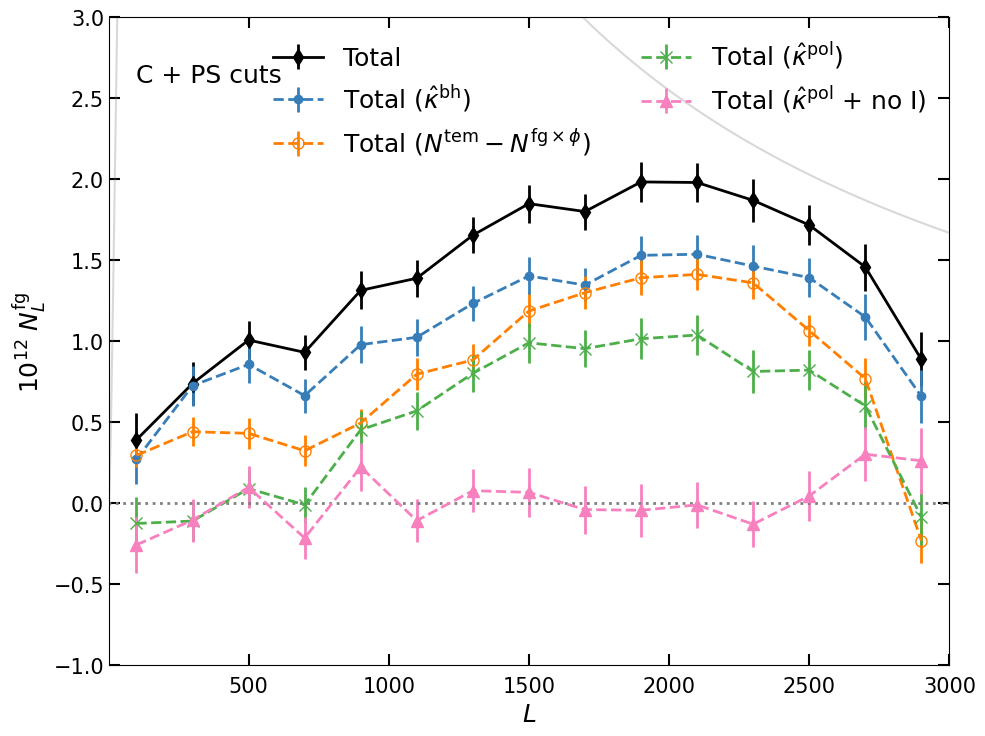

In [22]:
plt.rcParams['figure.figsize'] = [8, 6]
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=-3)
fac=1e12

ax.plot(ls_omega, cl_omega_fid*fac, color="grey", alpha=0.3)


nbins=15

linewidth=2

cl_tot = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_tsz_ksz_cib_rad_pm_cm/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_N0len = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_pm_cm/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl((cl_tot-cl_N0len)[:3001], nbins)
ax.errorbar(bins, cl_bin*fac, err*fac, label=r"Total", marker="d", markersize=8, elinewidth=2, alpha=1, linewidth=2, color="k")
# ax.plot(bins, cl_bin*fac, label=r"Total", alpha=1, linewidth=2, color="k")

cl_tot_ = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_tsz_ksz_cib_rad_pm_cm/SO_goal/kg/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_N0len_ = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_pm_cm/SO_goal/kg/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl((cl_tot_-cl_N0len_)[:3001], nbins)
# ax.errorbar(bins, cl_bin*fac, err*fac, label=r"Total (no I)", marker="d", markersize=6, elinewidth=2, alpha=1, linewidth=linewidth, linestyle="--")
# ax.plot(bins, cl_bin*fac, label=r"Total (no I)", alpha=1, linewidth=2, color="k", linestyle="--")


cl_tot_ = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_tsz_ksz_cib_rad_pm_cm/SO_goal/kgI/_old_ps_20_TEB_len_nN_gmv_bh_TEB_ncmbN.npy")
cl_N0len_ = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_pm_cm/SO_goal/kgI/_old_ps_20_TEB_len_nN_gmv_bh_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl((cl_tot_-cl_N0len_)[:3001], nbins)
ax.errorbar(bins, cl_bin*fac, err*fac, label=r"Total ($\hat{\kappa}^{\mathrm{bh}}$)", marker=".", markersize=12, elinewidth=2, alpha=1, linewidth=linewidth, linestyle="--")
# ax.plot(bins, cl_bin*fac, label=r"Total (bh)", alpha=1, linewidth=2, color="k", linestyle=":")


cl_unl = np.load(f"../cache_ag/_raw_ps/unlensed/HILC_tsz_ksz_cib_rad_pm_cm/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_N0_unl = np.load(f"../cache_ag/_raw_ps/unlensed/HILC_pm_cm/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl((cl_unl-cl_N0_unl)[:3001], nbins)
ax.errorbar(bins, cl_bin*fac, err*fac, label=r"Total ($N^{\mathrm{tem}}-N^{\mathrm{fg}\times\phi}$)", marker="o", markersize=8, mfc='none',  elinewidth=2, alpha=1, linewidth=linewidth, linestyle="--")
# ax.plot(bins, cl_bin*fac, label=r"Total", alpha=1, linewidth=2, color="k")

cl_tot_ = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_tsz_ksz_cib_rad_pm_cm/SO_goal/kgI/ps_20_EB_len_nN_EB_ncmbN.npy")
cl_N0len_ = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_pm_cm/SO_goal/kgI/ps_20_EB_len_nN_EB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl((cl_tot_-cl_N0len_)[:3001], nbins)
ax.errorbar(bins, cl_bin*fac, err*fac, label=r"Total ($\hat{\kappa}^{\mathrm{pol}}$)", marker="x", markersize=8, elinewidth=2, alpha=1, linewidth=linewidth, linestyle="--")
# ax.plot(bins, cl_bin*fac, label=r"Total ($\kappa^{\mathrm{pol}}$)", alpha=1, linewidth=2, color="k", linestyle="-.")

cl_tot_ = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_tsz_ksz_cib_rad_pm_cm/SO_goal/kg/ps_20_EB_len_nN_EB_ncmbN.npy")
cl_N0len_ = np.load(f"../cache_ag/_raw_ps/pbdem_zero/HILC_pm_cm/SO_goal/kg/ps_20_EB_len_nN_EB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl((cl_tot_-cl_N0len_)[:3001], nbins)
ax.errorbar(bins, cl_bin*fac, err*fac, label=r"Total ($\hat{\kappa}^{\mathrm{pol}}$ + no I)", marker="^", markersize=8, elinewidth=2, alpha=1, linewidth=linewidth, linestyle="--")
# ax.plot(bins, cl_bin*fac, label=r"Total ($\kappa^{\mathrm{pol}}$ + no I)", alpha=1, linewidth=2, color="k", linestyle="-")

ax.plot([0,5000], [0,0], linestyle=":", color="grey", linewidth=2)


ax.set_xlabel("$L$", fontsize=18)
ax.set_ylabel(r"$10^{12}$ $N_{L}^{\mathrm{fg}}$", fontsize=18)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax.tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax.tick_params(labelsize=15)
ax.set_ylim(-1, 3)
ax.set_xlim(2, 3000)
ax.legend(prop={'size': 18}, frameon=False,ncol=2, loc=1)

ax.text(100, 2.6, "C + PS cuts", fontsize=18)

# fig.savefig("_plots/fg_extra.pdf", bbox_inches='tight')

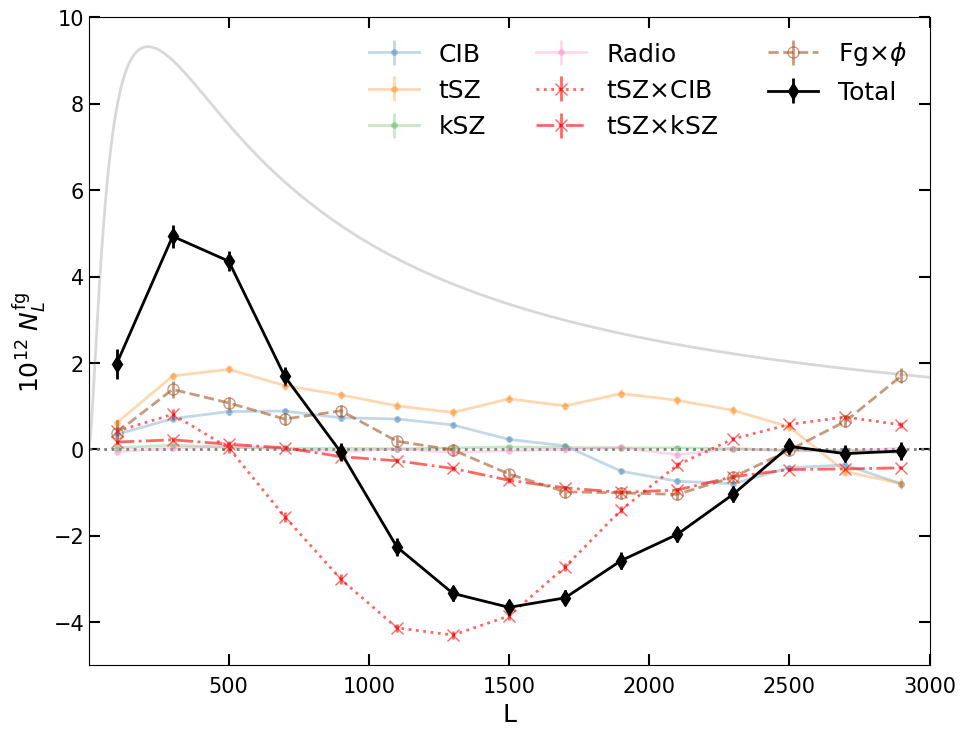

In [23]:
plt.rcParams['figure.figsize'] = [8, 6]
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=-3)
fac=1e12

nbins=15
cl_N0 = np.load("../cache_ag/_raw_ps/unlensed/HILC/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")

cl_I = np.load("../cache_ag/_raw_ps/unlensed//HILC_cib/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl((cl_I-cl_N0)[:3001], nbins)
ax.errorbar(bins, cl_bin*fac, err*fac, label="CIB", marker=".", markersize=8, elinewidth=2, alpha=0.3, linewidth=2)

cl_t = np.load("../cache_ag/_raw_ps/unlensed//HILC_tsz/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl((cl_t-cl_N0)[:3001], nbins)
ax.errorbar(bins, cl_bin*fac, err*fac, label="tSZ", marker=".", markersize=8, elinewidth=2, alpha=0.3, linewidth=2)

cl_k = np.load("../cache_ag/_raw_ps/unlensed//HILC_ksz/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl((cl_k-cl_N0)[:3001], nbins)
ax.errorbar(bins, cl_bin*fac, err*fac, label="kSZ", marker=".", markersize=8, elinewidth=2, alpha=0.3, linewidth=2)

cl_r = np.load("../cache_ag/_raw_ps/unlensed//HILC_rad/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl((cl_r-cl_N0)[:3001], nbins)
ax.errorbar(bins, cl_bin*fac, err*fac, label="Radio", marker=".", markersize=8, elinewidth=2, alpha=0.3, linewidth=2)

cl_tI= np.load("../cache_ag/_raw_ps/unlensed//HILC_tsz_cib/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl(((cl_tI-(cl_I-cl_N0)-(cl_t-cl_N0)-cl_N0))[:3001], nbins)
ax.errorbar(bins, cl_bin*fac, err*fac, label=r"tSZ$\times$CIB", marker="x", markersize=8, elinewidth=2, alpha=0.6, color="red", linewidth=2, linestyle=":")

cl_kI= np.load("../cache_ag/_raw_ps/unlensed//HILC_ksz_cib/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl(((cl_kI-(cl_I-cl_N0)-(cl_k-cl_N0)-cl_N0))[:3001], nbins)
# ax.errorbar(bins, cl_bin*fac, err*fac, label=r"kSZ$\times$CIB", marker="x", markersize=8, elinewidth=2, alpha=0.6, color="orange", linewidth=2, linestyle="-.")


cl_kt= np.load("../cache_ag/_raw_ps/unlensed//HILC_tsz_ksz/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl(((cl_kt-(cl_t-cl_N0)-(cl_k-cl_N0)-cl_N0))[:3001], nbins)
ax.errorbar(bins, cl_bin*fac, err*fac, label=r"tSZ$\times$kSZ", marker="x", markersize=8, elinewidth=2, alpha=0.6, color="red", linewidth=2, linestyle="-.")


ax.plot([0,5000], [0,0], linestyle=":", color="grey", linewidth=2)

ax.plot(ls_omega, cl_omega_fid*fac, color="grey", alpha=0.3, linewidth=2)

cl_unl = np.load("../cache_ag/_raw_ps/unlensed/HILC_tsz_ksz_cib_rad/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl((cl_unl-cl_N0)[:3001], nbins)
# ax.errorbar(bins, cl_bin*fac, err*fac, label="fg", marker="o", mfc='none', markersize=6, elinewidth=2, color="r")

cl_N0len = np.load("../cache_ag/_raw_ps/pbdem_zero/HILC/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
# cl_bin, bins, err = ag.sht.bin_cl(cl_N0len, nbins)
# ax.errorbar(bins, cl_bin*fac, err*fac, label="No fg", marker="o", mfc='none', markersize=6, elinewidth=2, color="r")


cl_tot = np.load("../cache_ag/_raw_ps/pbdem_zero/HILC_tsz_ksz_cib_rad/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl((cl_tot-(cl_unl-cl_N0)-cl_N0len)[:3001], nbins)
ax.errorbar(bins, cl_bin*fac, err*fac, label=r"Fg$\times \phi$", marker="o", mfc='none', markersize=8, elinewidth=2, linestyle="--", alpha=0.6, linewidth=2)

cl_bin, bins, err = ag.sht.bin_cl((cl_tot-cl_N0len)[:3001], nbins)
ax.errorbar(bins, cl_bin*fac, err*fac, label="Total", marker="d", markersize=8, elinewidth=2, color="k", linewidth=2)

#with omega
cl_tot = np.load("../cache_ag/_raw_ps/pbdem_dem/HILC_tsz_ksz_cib_rad/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_N0len = np.load("../cache_ag/_raw_ps/pbdem_dem/HILC/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl((cl_tot-cl_N0len)[:3001], nbins)
# ax.errorbar(bins, cl_bin*fac, err*fac, label="Total (w $\omega$)", marker="^", markersize=8, elinewidth=2, color="k", linewidth=2, linestyle=":")

cl_bin, bins, err = ag.sht.bin_cl(cl_N0len, nbins)
# ax.errorbar(bins, cl_bin*fac, err*fac, label="N0 (omega)", marker="d", markersize=8, elinewidth=2, color="pink", linewidth=2, linestyle=":")
cl_N0len = np.load("../cache_ag/_raw_ps/pbdem_zero/HILC/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")
cl_bin, bins, err = ag.sht.bin_cl((cl_N0len)[:3001], nbins)
# ax.errorbar(bins, cl_bin*fac, err*fac, label="N0 (no omega)", marker="x", markersize=8, elinewidth=2, color="pink", linewidth=2, linestyle=":")


cl_bin, bins, err = ag.sht.bin_cl(cl_tI-cl_N0+cl_r-cl_N0+cl_k-cl_N0+cl_tot-(cl_unl-cl_N0)-cl_N0len+(cl_kt-(cl_t-cl_N0)-(cl_k-cl_N0)-cl_N0), nbins)
# ax.errorbar(bins, cl_bin*fac, err*fac, label="sum", marker="d", markersize=8, elinewidth=2, color="k", linewidth=2)


ax.set_xlabel("L", fontsize=18)
ax.set_ylabel(r"$10^{12}$ $N_{L}^{\mathrm{fg}}$", fontsize=18)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax.tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax.tick_params(labelsize=15)
ax.set_ylim(-5, 10)
ax.set_xlim(2, 3000)
ax.legend(prop={'size': 18}, frameon=False,ncol=3)

# fig.savefig("_plots/fg.pdf", bbox_inches='tight')


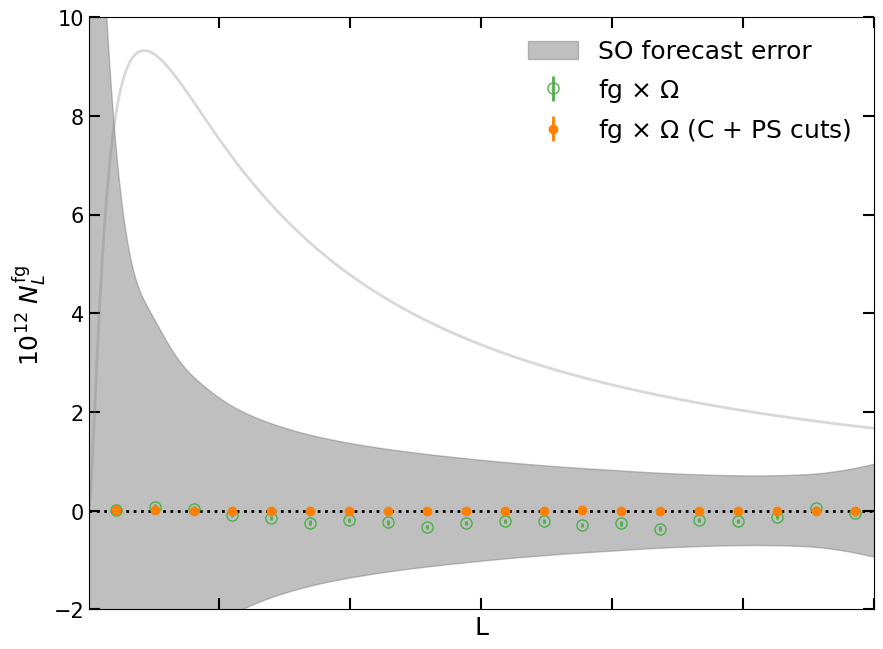

In [40]:
plt.rcParams['figure.figsize'] = [8, 6]
fig, ax = plt.subplots()
fig.tight_layout(pad=-1)
fac=1e12

nbins=20

cl_omega_fid = np.load("../cache_ag/_C_omega/C_omega.npy")
ls_omega = np.load("../cache_ag/_C_omega/Ls.npy")
omega_ps_fid_spline = InterpolatedUnivariateSpline(ls_omega, cl_omega_fid)

cl_fid_bin, bins, err_fid = dm.sht.bin_cl(omega_ps_fid_spline(np.arange(30,3001)), nbins)

ax.plot(ls_omega, cl_omega_fid*fac, alpha=0.3,  linewidth=2, color="grey")

cl_tot_w = np.load("../cache_ag/_raw_ps/pbdem_dem/HILC_tsz_ksz_cib_rad/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")[30:3001]
cl_N0len_w = np.load("../cache_ag/_raw_ps/pbdem_dem/HILC/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")[30:3001]

cl_tot = np.load("../cache_ag/_raw_ps/pbdem_zero/HILC_tsz_ksz_cib_rad/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")[30:3001]
cl_N0len = np.load("../cache_ag/_raw_ps/pbdem_zero/HILC/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")[30:3001]
cl_bin, bins, err = ag.sht.bin_cl((cl_tot_w-cl_N0len_w)-(cl_tot-cl_N0len), nbins)


ax.errorbar(bins+30, (cl_bin)*fac, err*fac, label=r"fg $\times$ $\Omega$", marker="o", mfc='none', markersize=8, elinewidth=2, linewidth=2, linestyle="", color='#4daf4a')

cl_tot_w = np.load("../cache_ag/_raw_ps/pbdem_dem/HILC_tsz_ksz_cib_rad_pm_cm/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")[30:3001]
cl_N0len_w = np.load("../cache_ag/_raw_ps/pbdem_dem/HILC_pm_cm/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")[30:3001]

cl_tot = np.load("../cache_ag/_raw_ps/pbdem_zero/HILC_tsz_ksz_cib_rad_pm_cm/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")[30:3001]
cl_N0len = np.load("../cache_ag/_raw_ps/pbdem_zero/HILC_pm_cm/SO_goal/kgI/ps_20_TEB_len_nN_gmv_TEB_ncmbN.npy")[30:3001]
cl_bin, bins, err = ag.sht.bin_cl((cl_tot_w-cl_N0len_w)-(cl_tot-cl_N0len), nbins)


ax.errorbar(bins+30, (cl_bin)*fac, err*fac, label=r"fg $\times$ $\Omega$ (C + PS cuts)", marker=".", markersize=12, elinewidth=2, linewidth=2, linestyle="", color='#ff7f00')



ax.plot([0,5000], [0,0], linestyle=":", color="k", linewidth=2)

Ls = np.arange(2, 3001)
SO_fill = ax.fill_between(ls_omega, (err_spline(ls_omega))*fac,(-err_spline(ls_omega))*fac, color="gray", alpha=0.5, label="SO forecast error")
# ax.errorbar(bins+30, (cl_fid_bin)*fac, err_spline(bins+30)*fac, label="Curl bias", marker="", markersize=8, elinewidth=2, linewidth=2, linestyle="", color="grey")


ax.set_xlabel("L", fontsize=18)
ax.set_ylabel(r"$10^{12}$ $N^{\mathrm{fg}}_L$ ", fontsize=18)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax.tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax.tick_params(labelsize=15)
ax.set_ylim(-2, 10)
ax.set_xlim(2, 3000)
ax.legend(prop={'size': 18}, frameon=False)
ax.tick_params(labelbottom=False)


# fig.savefig("_plots/fg_w.pdf", bbox_inches='tight')




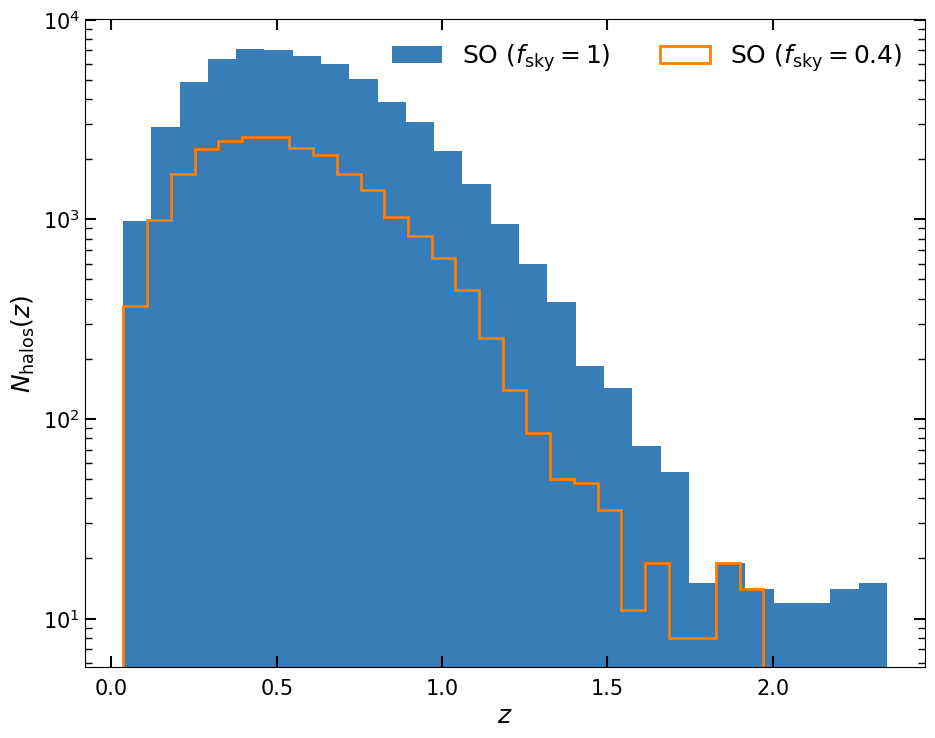

In [41]:
plt.rcParams['figure.figsize'] = [8, 6]
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=-3)

mass = np.load("../../../AGORA/halocat/mass.npy")
zs = np.load("../../../AGORA/halocat/z.npy")
indices = np.argsort(mass)[::-1]

Nhalos = 60000

mass_ = mass[indices][:Nhalos]
zs_ = zs[indices][:Nhalos]

ax.hist(zs_, bins=27, log=True, label="SO ($f_{\mathrm{sky}}=1$)", histtype='stepfilled')

Nhalos = 24000
mass_ = mass[indices][:Nhalos]
zs_ = zs[indices][:Nhalos]

ax.hist(zs_, bins=27, log=True, histtype="step", linewidth=2, label="SO ($f_{\mathrm{sky}}=0.4$)")
ax.set_xlabel("$z$", fontsize=18)
ax.set_ylabel(r"$N_{\mathrm{halos}}(z)$", fontsize=18)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax.tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax.tick_params(labelsize=15)
ax.legend(prop={'size': 18}, frameon=False,ncol=2)

# fig.savefig("_plots/halos.pdf", bbox_inches='tight')


In [42]:
omega = ag.get_omega_map()
omega_ag= ag.get_omega_map_original()

cl_w = ag.sht.map2cl(omega)
cl_w_orig = ag.sht.map2cl(omega_ag)

(30, 3000)

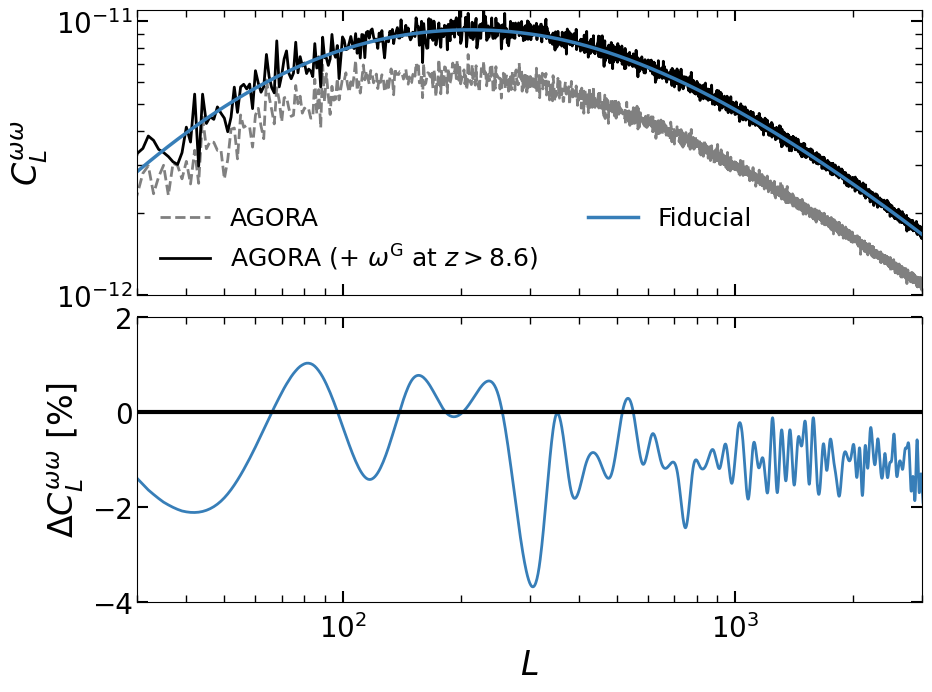

In [45]:
plt.rcParams['figure.figsize'] = [8, 6]
fig, ax = plt.subplots(2,1)
fig.tight_layout(pad=-1)

cl_omega_fid = np.load("../cache_ag/_C_omega/C_omega.npy")
ls_omega = np.load("../cache_ag/_C_omega/Ls.npy")

ax[0].loglog(cl_w_orig, color="grey", linewidth=2, label="AGORA", linestyle="--")
ax[0].plot(cl_w, color="k", linewidth=2, label="AGORA (+ $\omega^{\mathrm{G}}$ at $z>8.6$)")
ax[0].plot(ls_omega, cl_omega_fid, linewidth=2.5, label="Fiducial", linestyle="-")

ax[0].legend(prop={'size': 18}, frameon=False, ncol=2)
# ax[0].yaxis.get_offset_text().set_fontsize(13)
ax[0].set_ylabel("$C^{\omega\omega}_{L}$", fontsize=24)
ax[0].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[0].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[0].tick_params(labelsize=20)
# ax[0].set_ylim(0e-11,1.1e-11)
ax[0].set_ylim(0.1e-11,1.1e-11)
ax[0].set_xlim(30, 3000)
ax[0].tick_params(labelbottom=False)  


ax[1].semilogx(((cl_omega_fid[10:]-ag.sht.smoothed_cl(cl_w[10:],150))/cl_omega_fid[10:])*100, linestyle="-", linewidth=2)
# ax[1].semilogx(((cl_omega_fid[10:]-ag.sht.smoothed_cl(cl_w_orig[10:],150))/cl_omega_fid[10:])*100, linestyle="-", linewidth=2)



ax[1].plot([0,5000],[0,0], color="k", linewidth=3)

ax[1].set_ylabel("$\Delta C^{\omega\omega}_{L}$ [%]", fontsize=24)
ax[1].set_xlabel("$L$", fontsize=24)
ax[1].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[1].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[1].tick_params(labelsize=20)
ax[1].set_ylim(-4,2)
ax[1].set_xlim(30, 3000)

# fig.savefig("_plots/delta_omega_ag.pdf", bbox_inches='tight')


In [ ]:
#Bias plots

In [46]:
omega_ps_fid = np.load("../cache/_C_omega/C_omega.npy")
omega_ells = np.load("../cache/_C_omega/Ls.npy")

In [50]:

Ls_S4_N1_teb_it = np.load(f"../../../bias/results_final///S4_base/TEB_iter_gmv/kgI/N1/Ls.npy")
N_S4_N1_teb_it = np.load(f"../../../bias/results_final//S4_base/TEB_iter_gmv/kgI/N1/N.npy")

Ls_S4_N0_teb_it = np.load(f"../../../bias/results_final//S4_base/TEB_iter_gmv/kgI/N0/Ls.npy")
N_S4_N0_teb_it = np.load(f"../../../bias/results_final//S4_base/TEB_iter_gmv/kgI/N0/N.npy")

Ls_S4_N2_teb_it = np.load(f"../../../bias/results_final//S4_base/TEB_iter_gmv/kgI/N2/Ls.npy")
N_S4_N2_teb_it = np.load(f"../../../bias/results_final/S4_base/TEB_iter_gmv/kgI/N2/N.npy")


Ls_S4_N1_teb = np.load(f"../../../bias/results_final//S4_base/TEB_gmv/kgI/N1/Ls.npy")
N_S4_N1_teb = np.load(f"../../../bias/results_final//S4_base/TEB_gmv/kgI/N1/N.npy")

Ls_S4_N0_teb = np.load(f"../../../bias/results_final//S4_base/TEB_gmv/kgI/N0/Ls.npy")
N_S4_N0_teb = np.load(f"../../../bias/results_final//S4_base/TEB_gmv/kgI/N0/N.npy")

Ls_S4_N2_teb = np.load(f"../../../bias/results_final/S4_base/TEB_gmv/kgI/N2/Ls.npy")
N_S4_N2_teb = np.load(f"../../../bias/results_final/S4_base/TEB_gmv/kgI/N2/N.npy")

In [51]:

Ls_SO_N1_teb_it = np.load(f"../../../bias/results_final//SO_goal/TEB_iter_gmv/kgI/N1/Ls.npy")
N_SO_N1_teb_it = np.load(f"../../../bias/results_final//SO_goal/TEB_iter_gmv/kgI/N1/N.npy")

Ls_SO_N0_teb_it = np.load(f"../../../bias/results_final//SO_goal/TEB_iter_gmv/kgI/N0/Ls.npy")
N_SO_N0_teb_it = np.load(f"../../../bias/results_final//SO_goal/TEB_iter_gmv/kgI/N0/N.npy")

Ls_SO_N2_teb_it = np.load(f"../../../bias/results_final//SO_goal/TEB_iter_gmv/kgI/N2/Ls.npy")
N_SO_N2_teb_it = np.load(f"../../../bias/results_final/SO_goal/TEB_iter_gmv/kgI/N2/N.npy")



Ls_SO_N1_teb = np.load(f"../../../bias/results_final//SO_goal/TEB_gmv/kgI/N1/Ls.npy")
N_SO_N1_teb = np.load(f"../../../bias/results_final//SO_goal/TEB_gmv/kgI/N1/N.npy")

Ls_SO_N0_teb = np.load(f"../../../bias/results_final/SO_goal/TEB_gmv/kgI/N0/Ls.npy")
N_SO_N0_teb = np.load(f"../../../bias/results_final/SO_goal/TEB_gmv/kgI/N0/N.npy")

Ls_SO_N2_teb = np.load(f"../../../bias/results_final/SO_goal/TEB_gmv/kgI/N2/Ls.npy")
N_SO_N2_teb = np.load(f"../../../bias/results_final/SO_goal/TEB_gmv/kgI/N2/N.npy")

In [52]:

Ls_dp_N1_eb_it = np.load(f"../../../bias/results_final/S4_dp/EB_iter_gmv/kgI/N1/Ls.npy")
N_dp_N1_eb_it  = np.load(f"../../../bias/results_final/S4_dp/EB_iter_gmv/kgI/N1/N.npy")

Ls_dp_N0_eb_it  = np.load(f"../../../bias/results_final/S4_dp/EB_iter_gmv/kgI/N0/Ls.npy")
N_dp_N0_eb_it  = np.load(f"../../../bias/results_final/S4_dp/EB_iter_gmv/kgI/N0/N.npy")

Ls_dp_N2_eb_it  = np.load(f"../../../bias/results_final/S4_dp/EB_iter_gmv/kgI/N2/Ls.npy")
N_dp_N2_eb_it  = np.load(f"../../../bias/results_final/S4_dp/EB_iter_gmv/kgI/N2/N.npy")


Ls_dp_N1_eb = np.load(f"../../../bias/results/S4_dp/EB_gmv/kgI/N1/Ls.npy")
N_dp_N1_eb  = np.load(f"../../../bias/results/S4_dp/EB_gmv/kgI/N1/N.npy")

Ls_dp_N0_eb  = np.load(f"../../../bias/results/S4_dp/EB_gmv/kgI/N0/Ls.npy")
N_dp_N0_eb  = np.load(f"../../../bias/results/S4_dp/EB_gmv/kgI/N0/N.npy")

Ls_dp_N2_eb  = np.load(f"../../../bias/results/S4_dp/EB_gmv/kgI/N2/Ls.npy")
N_dp_N2_eb  = np.load(f"../../../bias/results/S4_dp/EB_gmv/kgI/N2/N.npy")

Text(0, 0.5, '$10^{12}$ $N^{\\mathrm{tem}}_{L}$')

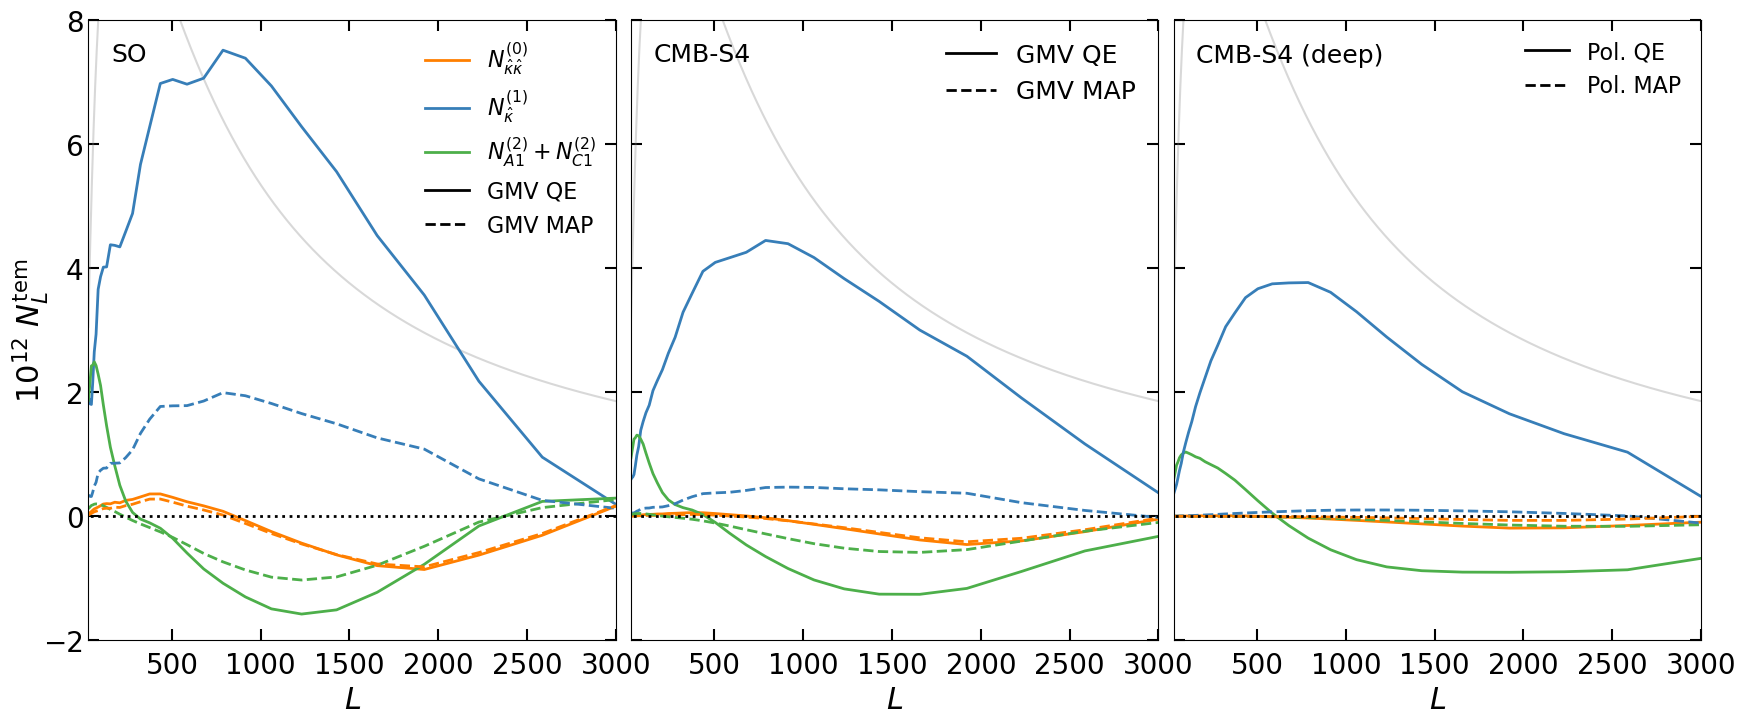

In [53]:
plt.rcParams['figure.figsize'] = [16, 6]
fig, ax = plt.subplots(1,3)
fig.tight_layout(pad=-2)

N0_color='#ff7f00'
N1_color='#377eb8'
N2_color='#4daf4a'

scale_fac = 1e12
ax[1].plot(omega_ps_fid*scale_fac, color="grey", alpha=0.3)
ax[1].plot(Ls_S4_N0_teb, (N_S4_N0_teb)*scale_fac, linewidth=2, color=N0_color)
ax[1].plot(Ls_S4_N1_teb, (N_S4_N1_teb)*scale_fac, linewidth=2, color=N1_color)
ax[1].plot(Ls_S4_N2_teb, (N_S4_N2_teb)*scale_fac, linewidth=2, color=N2_color)
ax[1].plot(Ls_S4_N0_teb_it, (N_S4_N0_teb_it)*scale_fac, linewidth=2, linestyle="--", color=N0_color)
ax[1].plot(Ls_S4_N1_teb, (N_S4_N1_teb_it)*scale_fac, linewidth=2, linestyle="--", color=N1_color)
ax[1].plot(Ls_S4_N2_teb_it, (N_S4_N2_teb_it)*scale_fac, linewidth=2, linestyle="--", color=N2_color)
ax[1].plot([0,5000],[0,0], color="k", linewidth=2, linestyle=":")
ax[1].plot([0,0],[0,0], linestyle="-", linewidth=2, color="k", label="GMV QE")
ax[1].plot([0,0],[0,0], linestyle="--", linewidth=2, color="k", label="GMV MAP")
ax[1].legend(prop={'size': 18}, frameon=False, ncol=1)
anchored_text = AnchoredText("CMB-S4", loc=2, frameon=False, prop={'size': 18})
ax[1].add_artist(anchored_text)



ax[1].yaxis.get_offset_text().set_fontsize(16)
# ax[1].set_ylabel("$N^{\mathrm{tem}}_{L}(\phi)$", fontsize=22)
ax[1].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[1].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[1].tick_params(labelsize=20)
ax[1].set_ylim(-2, 8)
ax[1].set_xlim(30, 3000)
ax[1].set_xlabel("$L$", fontsize=22)
ax[1].tick_params(labelleft=False)

#------------

ax[0].plot(omega_ps_fid*scale_fac, color="grey", alpha=0.3)
ax[0].plot(Ls_SO_N1_teb, (N_SO_N0_teb)*scale_fac, linewidth=2, color=N0_color, label="$N^{(0)}_{\hat{\kappa}\hat{\kappa}}$")
ax[0].plot(Ls_SO_N1_teb, (N_SO_N1_teb)*scale_fac, linewidth=2, color=N1_color, label="$N^{(1)}_{\hat{\kappa}}$")
ax[0].plot(Ls_SO_N2_teb, (N_SO_N2_teb)*scale_fac, linewidth=2, color=N2_color, label="$N^{(2)}_{A1}+N^{(2)}_{C1}$")
ax[0].plot(Ls_SO_N2_teb_it, (N_SO_N2_teb_it)*scale_fac, linewidth=2, linestyle="--", color=N2_color)
ax[0].plot(Ls_SO_N1_teb_it, (N_SO_N1_teb_it)*scale_fac, linewidth=2, linestyle="--", color=N1_color)
ax[0].plot(Ls_SO_N0_teb_it, (N_SO_N0_teb_it)*scale_fac, linewidth=2, linestyle="--", color=N0_color)
# ax[0].errorbar(bins_so, ps_signal_it*scale_fac, err_signal_it*scale_fac, linestyle="", marker=".", markersize=12, elinewidth=2, capsize=3)
# ax[0].errorbar(bins_so, ps_pb_dem_it_so*scale_fac, err_pb_dem_it_so*scale_fac, linestyle="", marker="x", markersize=12, elinewidth=2, capsize=3)
ax[0].plot([0,5000],[0,0], color="k", linewidth=2, linestyle=":")
ax[0].plot([0,0],[0,0], linestyle="-", linewidth=2, color="k", label="GMV QE")
ax[0].plot([0,0],[0,0], linestyle="--", linewidth=2, color="k", label="GMV MAP")

anchored_text = AnchoredText("SO", loc=2, frameon=False, prop={'size': 18})
ax[0].add_artist(anchored_text)

ax[0].legend(prop={'size': 16}, frameon=False, ncol=1)
ax[0].yaxis.get_offset_text().set_fontsize(16)
ax[0].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[0].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[0].tick_params(labelsize=20)
ax[0].set_ylim(-2, 8)
ax[0].set_xlim(30, 3000)
ax[0].set_xlabel("$L$", fontsize=22)


#------------

ax[2].plot(omega_ps_fid*scale_fac, color="grey", alpha=0.3)
ax[2].plot(Ls_dp_N1_eb_it, (N_dp_N2_eb)*scale_fac, linewidth=2, color=N2_color)
ax[2].plot(Ls_dp_N1_eb_it, (N_dp_N1_eb)*scale_fac, linewidth=2, color=N1_color)
ax[2].plot(Ls_dp_N1_eb_it, (N_dp_N0_eb)*scale_fac, linewidth=2, color=N0_color)
ax[2].plot(Ls_dp_N1_eb_it, (N_dp_N2_eb_it)*scale_fac, linewidth=2, linestyle="--", color=N2_color)
ax[2].plot(Ls_dp_N1_eb_it, (N_dp_N1_eb_it)*scale_fac, linewidth=2, linestyle="--", color=N1_color)
ax[2].plot(Ls_dp_N1_eb_it, (N_dp_N0_eb_it)*scale_fac, linewidth=2, linestyle="--", color=N0_color)
ax[2].plot([0,5000],[0,0], color="k", linewidth=2, linestyle=":")
ax[2].plot([0,0],[0,0], linestyle="-", linewidth=2, color="k", label="Pol. QE")
ax[2].plot([0,0],[0,0], linestyle="--", linewidth=2, color="k", label="Pol. MAP")

anchored_text = AnchoredText("CMB-S4 (deep)", loc=2, frameon=False, prop={'size': 18})
ax[2].add_artist(anchored_text)

ax[2].legend(prop={'size': 16}, frameon=False, ncol=1)
ax[2].yaxis.get_offset_text().set_fontsize(16)
ax[2].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[2].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[2].tick_params(labelsize=20)
ax[2].set_ylim(-2, 8)
ax[2].set_xlim(30, 3000)
ax[2].set_xlabel("$L$", fontsize=22)
ax[2].tick_params(labelleft=False)


fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.ylabel(r"$10^{12}$ $N^{\mathrm{tem}}_{L}$", fontsize=22)


# fig.savefig("_plots/map_bias_analytic.pdf", bbox_inches='tight')


In [55]:
nbins=25
ps_pb_4, bins, err_pb_4 = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_zero/S4_base/kgI/ps_20_TEB_len_gmv_TEB.npy")[30:3001], nbins)
nbins=25
ps_pb_, bins_so, err_pb_ = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_zero/SO_goal/kgI/ps_20_TEB_len_gmv_TEB.npy")[30:3001], nbins)


In [56]:
nbins=25
ps_it_so, bins_so, err_it_so = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_zero/SO_goal/kgI/ps_20_TEB_iter_len_gmv_TEB_iter.npy")[30:3001], nbins)
nbins=25
ps_it, bins, err_it = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_zero/S4_base/kgI/ps_20_TEB_iter_len_gmv_TEB_iter.npy")[30:3001], nbins)


nbins=25
ps_it_so_mc, bins_so, err_it_so_mc = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_zero/SO_goal/kgI/ps_20_TEB_iter_len_mc_gmv_TEB_iter.npy")[30:3001], nbins)
nbins=25
ps_it_mc, bins, err_it_mc = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_zero/S4_base/kgI/ps_20_TEB_iter_len_mc_gmv_TEB_iter.npy")[30:3001], nbins)


In [57]:
ps_pb_z_dp, bins_, err_pb_z_dp = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_zero/S4_dp/kgI/ps_20_EB_len_gmv_EB.npy")[30:3001], nbins)
ps_it_dp, bins_, err_it_dp = dm.sht.bin_cl(np.load("../cache/_raw_ps/pbdem_zero/S4_dp/kgI/ps_20_EB_iter_len_mc_EB_iter.npy")[30:3001], nbins)

Text(0, 0.5, '$10^{12}$ $N^{\\mathrm{tem}}_{L}$')

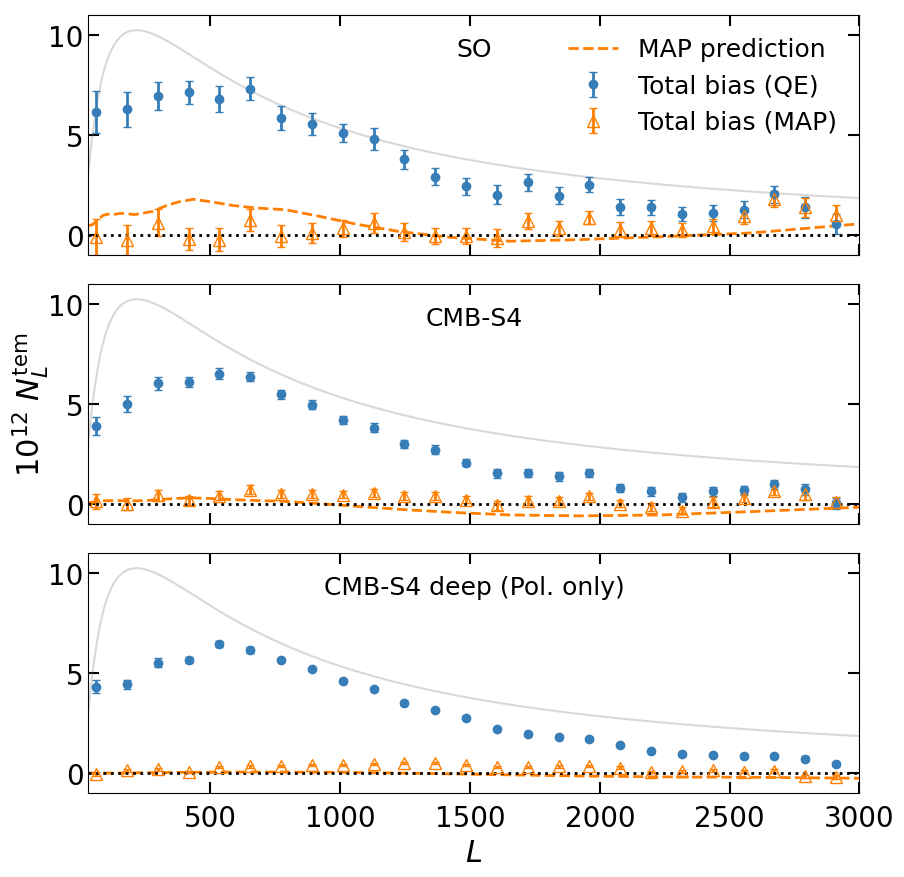

In [58]:
plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots(3,1)
fig.tight_layout(pad=-.5)

scale_fac = 1e12

ax[0].plot(omega_ps_fid*scale_fac, color="grey", alpha=0.3)
ax[0].errorbar(bins_so, ps_pb_*scale_fac, err_pb_*scale_fac, linestyle="", marker=".", markersize=12, elinewidth=2, capsize=3, color='#377eb8', label="Total bias (QE)")
# ax[0].plot(Ls_SO_N1_teb, (N_SO_N2_teb+N_SO_N1_teb+N_SO_N0_teb)*scale_fac, linewidth=2, label="QE prediction", color='#377eb8')
ax[0].errorbar(bins_so, ps_it_so*scale_fac, err_it_so*scale_fac, linestyle="", marker="^", markersize=8, elinewidth=2, capsize=3, mfc='none', color='#ff7f00', label="Total bias (MAP)")
ax[0].plot(Ls_SO_N1_teb_it, (N_SO_N2_teb_it+N_SO_N1_teb_it+N_SO_N0_teb_it)*scale_fac, linewidth=2, linestyle="--", label="MAP prediction", color='#ff7f00')
# ax[0].plot(Ls_SO_N1_teb_it_old, (N_SO_N2_teb_it_old+N_SO_N1_teb_it_old+N_SO_N0_teb_it_old)*scale_fac, linewidth=2, linestyle="-.", label="MAP prediction", color='#ff7f00')
ax[0].plot([0,5000],[0,0], color="k", linewidth=2, linestyle=":")

anchored_text = AnchoredText("SO", loc=9, frameon=False, prop={'size': 18})
ax[0].add_artist(anchored_text)

ax[0].legend(prop={'size': 18}, frameon=False, ncol=1)
ax[0].yaxis.get_offset_text().set_fontsize(16)
ax[0].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[0].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[0].tick_params(labelsize=20)
ax[0].set_ylim(-1, 11)
ax[0].set_xlim(30, 3000)
ax[0].tick_params(labelbottom=False)


#----------

ax[1].plot(omega_ps_fid*scale_fac, color="grey", alpha=0.3)
ax[1].errorbar(bins, ps_pb_4*scale_fac, err_pb_4*scale_fac, linestyle="", marker=".", label="Total bias (QE)", markersize=12, elinewidth=2, capsize=3, color='#377eb8')
# ax[1].plot(Ls_S4_N1_teb, (N_S4_N2_teb+N_S4_N1_teb+N_S4_N0_teb)*scale_fac, linewidth=2, color='#377eb8')
ax[1].errorbar(bins, ps_it*scale_fac, err_it*scale_fac, linestyle="", marker="^", label="Total bias (MAP)", markersize=8, elinewidth=2, capsize=3,mfc='none', color='#ff7f00')
ax[1].plot(Ls_S4_N1_teb_it, (N_S4_N2_teb_it+N_S4_N1_teb_it+N_S4_N0_teb_it)*scale_fac, linewidth=2, linestyle="--", color='#ff7f00')
# ax[1].plot(Ls_S4_N1_teb_it, (N_S4_N2_teb_it_old+N_S4_N1_teb_it_old+N_S4_N0_teb_it_old)*scale_fac, linewidth=2, linestyle="-.", color='#ff7f00')
ax[1].plot([0,5000],[0,0], color="k", linewidth=2, linestyle=":")
# ax[1].legend(prop={'size': 18}, frameon=False, ncol=1)
anchored_text = AnchoredText("CMB-S4", loc=9, frameon=False, prop={'size': 18})
ax[1].add_artist(anchored_text)

ax[1].yaxis.get_offset_text().set_fontsize(16)
# ax[1].set_ylabel("$N^{\mathrm{tem}}_{L}(\phi)$", fontsize=22)
ax[1].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[1].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[1].tick_params(labelsize=20)
ax[1].set_ylim(-1, 11)
ax[1].set_xlim(30, 3000)
ax[1].tick_params(labelbottom=False)

#-----------

ax[2].plot(omega_ps_fid*scale_fac, color="grey", alpha=0.3)
ax[2].errorbar(bins, ps_pb_z_dp*scale_fac, err_pb_z_dp*scale_fac, linestyle="", marker=".", markersize=12, elinewidth=2, capsize=3, color='#377eb8')
# ax[2].plot(Ls_dp_N1_eb, (N_dp_N2_eb+N_dp_N1_eb+N_dp_N0_eb)*scale_fac, linewidth=2, color='#377eb8')
ax[2].errorbar(bins, ps_it_dp*scale_fac, err_it_dp*scale_fac, linestyle="", marker="^", markersize=8, elinewidth=2, capsize=3,mfc='none', color='#ff7f00')
ax[2].plot(Ls_dp_N2_eb_it, (N_dp_N2_eb_it+N_dp_N1_eb_it+N_dp_N0_eb_it)*scale_fac, linewidth=2, linestyle="--", color='#ff7f00')
# ax[2].plot(Ls_dp_N2_eb_it, (N_dp_N2_eb_it_old+N_dp_N1_eb_it_old+N_dp_N0_eb_it_old)*scale_fac, linewidth=2, linestyle="-.", color='#ff7f00')
ax[2].plot([0,5000],[0,0], color="k", linewidth=2, linestyle=":")
ax[2].legend(prop={'size': 18}, frameon=False, ncol=1)
anchored_text = AnchoredText("CMB-S4 deep (Pol. only)", loc=9, frameon=False, prop={'size': 18})
ax[2].add_artist(anchored_text)

ax[2].yaxis.get_offset_text().set_fontsize(16)
# ax[2].set_ylabel("$N^{\mathrm{tem}}_{L}(\phi)$", fontsize=22)
ax[2].tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax[2].tick_params(top=True, right=True, direction="in", which="major", length=8, width=1.5)
ax[2].tick_params(labelsize=20)
ax[2].set_ylim(-1, 11)
ax[2].set_xlim(30, 3000)
ax[2].set_xlabel("$L$", fontsize=22)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.ylabel(r"$10^{12}$ $N^{\mathrm{tem}}_{L}$", fontsize=22)

# 
# fig.savefig("_plots/map_bias_long.pdf", bbox_inches='tight')


In [ ]:
#Fisher plots

In [66]:
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
from omegaqe.cosmology import Cosmology
import copy

cosmo = Cosmology(paramfile="Planck")

Setting up cosmology with CAMB ini file at /mnt/lustre/users/astro/mr671/omegaQE/omegaqe/../fullsky_sims/data/CAMB/Planck_2018.ini


In [67]:
def _get_F_bi(loc, exp, temp, param_str):
    F = np.load(f"{loc}/{exp}/{temp}/{param_str}/F_bi_long.npy")
    N_params=np.size(param_str.split("_")[1:])
    F_res = np.empty((N_params,N_params))
    count=0
    for iii in range(N_params):
        for jjj in range(N_params):
            F_res[iii][jjj] = F[count]
            count += 1
            
    for iii in range(N_params):
        for jjj in range(iii, N_params):
            F_res[iii][jjj] = (F_res[iii][jjj] + F_res[jjj][iii])/2
            F_res[jjj][iii] = F_res[iii][jjj]
    return F_res

In [68]:
def _get_F(loc, exp, temp, param_str, typ):
    if typ == "bi":
        return _get_F_bi(loc, exp, temp, param_str)
    F = np.load(f"{loc}/{exp}/{temp}/{param_str}/F_{typ}.npy")
    N_params=np.size(param_str.split("_")[1:])
    F_res = np.empty((N_params,N_params))
    count=0
    for iii in range(N_params):
            for jjj in range(iii, N_params):
                F_res[iii][jjj] = F[count]
                F_res[jjj][iii] = F[count]
                count += 1
    return F_res

In [69]:
def get_fish_results(typ="kk", loc="../../../fish/results_final/", exp="SO_goal", temp="kgI", param_str="_100thetastar_ombh2_omch2_ns_tau_sig8_mnu_w", params = ["100thetastar", "omch2", "sig8"], null_params=None, tau_prior=False):
    F = _get_F(loc, exp, temp, param_str, typ)
    F_red = copy.deepcopy(F)
    params_tot = param_str.split("_")[1:]
    indices = [params_tot.index(param) for param in params]
    for iii in np.arange(np.shape(F_red)[0]):
        if iii not in indices:
            F_red[:,iii] = 0
            F_red[iii,:] = 0
    good_idx = F_red != 0
    dims = np.size(indices)
    if tau_prior:
        sig_tau = 0.007
        idx_t = params_tot.index("tau")
        F_red[idx_t,idx_t] += 1/sig_tau**2
    if null_params is not None:
        for param in null_params:
            idx = params_tot.index(param)
            F_red[:,idx] = 0
            F_red[idx,:] = 0
    return F_red[good_idx].reshape((dims,dims))
    

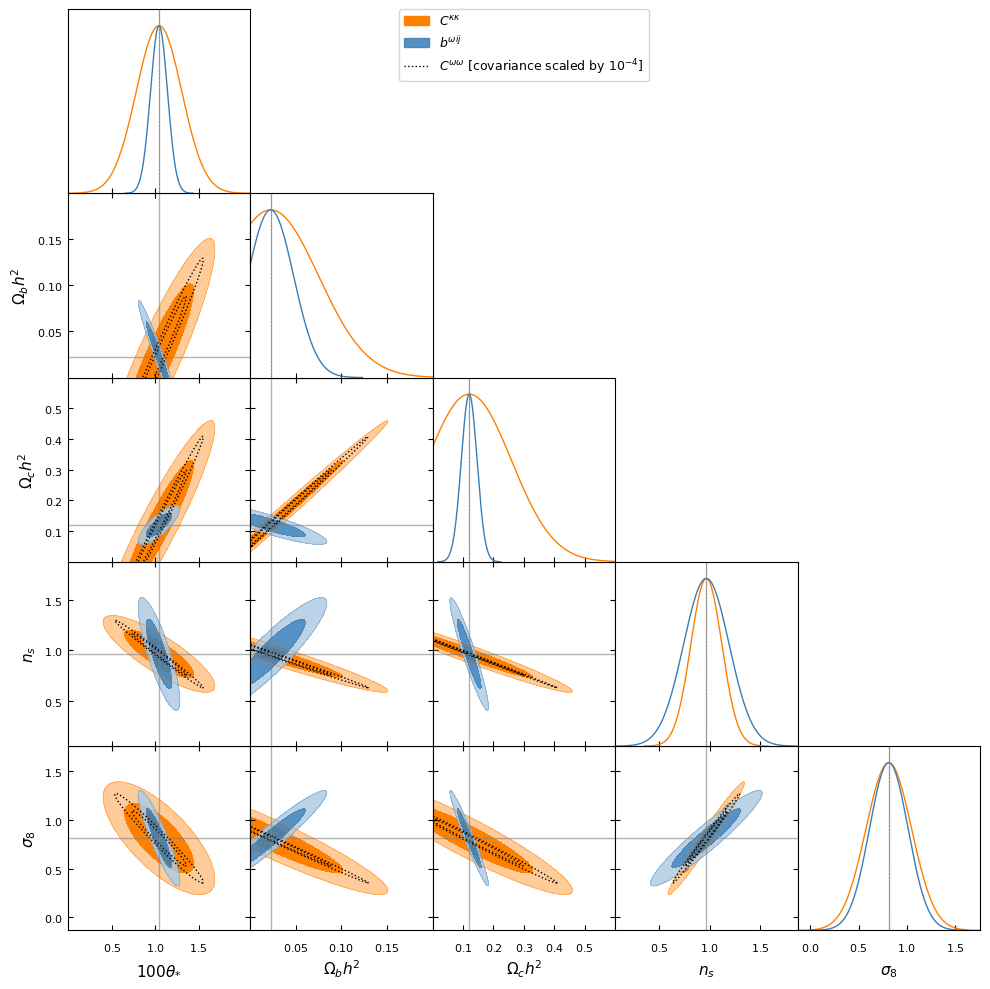

In [70]:
colours = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']
colours_3k = ['#377eb8', '#ff7f00', 'k', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

params = ["100thetastar","ombh2", "omch2","ns","tau","sig8"]
F_bi = get_fish_results("bi", params=params, exp="S4_base", tau_prior=True, param_str="_100thetastar_ombh2_omch2_ns_tau_sig8_mnu_w_b1")
params = ["100thetastar","ombh2", "omch2","ns","tau","sig8"]
F_kk = get_fish_results("kk", params=params, exp="S4_base", tau_prior=True)
F_ww_100 = get_fish_results("ww",params=params, exp="S4_base", tau_prior=True)*10000
F_ww = get_fish_results("ww",params=params, exp="S4_base", tau_prior=True)

labels = [r"100\theta_{*}", "\Omega_bh^2", "\Omega_ch^2","n_s", r"tau","\sigma_8"]

pars_dict = cosmo.get_pars_dict(cosmo._pars)
mean = [pars_dict[param] for param in params]
gauss_kk=GaussianND(mean, np.linalg.inv(F_kk), labels=labels, label='$C^{\kappa\kappa}$', names=params)
gauss_bi=GaussianND(mean, np.linalg.inv(F_bi), labels=labels, label='$b^{\omega ij}$', names=params)
gauss_ww=GaussianND(mean, np.linalg.inv(F_ww), labels=labels, label='$C^{\omega\omega}$', names=params)
gauss_ww_100=GaussianND(mean, np.linalg.inv(F_ww_100), labels=labels, label=r'$C^{\omega\omega}$ [covariance scaled by $10^{-4}$]', names=params)

gauss_kk_ww=GaussianND(mean, np.linalg.inv(F_kk+F_ww), labels=labels, label='$C^{\kappa\kappa}+C^{\omega\omega}$', names=params)

markers = {param: mean[iii] for iii, param in enumerate(params)}

g = plots.get_subplot_plotter()
g.triangle_plot([gauss_kk, gauss_bi, gauss_ww_100],contour_colors=['#ff7f00', '#377eb8', 'k'], params=["100thetastar","ombh2", "omch2", "ns","sig8"], markers=markers, marker_args={'ls':"-", "color":"grey", "alpha":0.6, "lw":1}, param_limits={"ombh2":(0,0.2),"omch2":(0,0.6)},filled= [True, True, False], contour_ls=["-","-",":"], contour_lws=[1,1,1],line_args=[{'alpha':1, 'color':'#ff7f00'},{'alpha':1, "color":'#377eb8'},{'alpha':0,"color":"k"}])

for i, param in enumerate(["100thetastar","ombh2", "omch2", "ns","sig8"]):
    g.subplots[i, i].axvline(pars_dict[param], ls="-", color="grey", alpha=0.6, lw=1)
    
# g.export("_plots/triangle.pdf")


In [71]:
params = ["100thetastar", "ombh2", "omch2", "ns", "sig8", "b1"]
F_bi = get_fish_results("bi", params=params, exp="S4_base", param_str="_100thetastar_ombh2_omch2_ns_tau_sig8_mnu_w_b1")

pars_dict = cosmo.get_pars_dict(cosmo._pars)
mean = [pars_dict[param] for param in params]

params_t = ["100thetastar", "ombh2", "omch2", "ns", "tau", "sig8", "b1"]

F_bi_t = get_fish_results("bi", params=params_t, exp="S4_base",param_str="_100thetastar_ombh2_omch2_ns_tau_sig8_mnu_w_b1", tau_prior=False)
F_bi_t_single = get_fish_results("bi", params=params_t, exp="S4_base", param_str="_100thetastar_ombh2_omch2_ns_tau_sig8_mnu_w_b1", tau_prior=True)
F_lss_t = get_fish_results("lss", params=params_t, exp="S4_base", param_str="_100thetastar_ombh2_omch2_ns_tau_sig8_mnu_w_b1", tau_prior=True)
random_state = np.random.default_rng(10) # seed random generator

pars_dict = cosmo.get_pars_dict(cosmo._pars)
mean_t = [pars_dict[param] for param in params_t]


for param in params:
    
    samps = random_state.multivariate_normal(mean, np.linalg.inv(F_bi), size=100000)
    samples = MCSamples(samples=samps,names = params, labels = params)
    print("bi: " + samples.getInlineLatex(param))
    
    samps = random_state.multivariate_normal(mean_t, np.linalg.inv(F_bi_t_single), size=100000)
    samples = MCSamples(samples=samps,names = params_t, labels = params_t)
    print("bi_t: " + samples.getInlineLatex(param))
    
    samps = random_state.multivariate_normal(mean_t, np.linalg.inv(F_lss_t), size=100000)
    samples = MCSamples(samples=samps,names = params_t, labels = params_t)
    print("lss: " + samples.getInlineLatex(param))
    
    samps = random_state.multivariate_normal(mean_t, np.linalg.inv(F_lss_t+F_bi_t), size=100000)
    samples = MCSamples(samples=samps,names = params_t, labels = params_t)
    print("lss+ww: " + samples.getInlineLatex(param))
    print("---------------")

Removed no burn in
bi: 100thetastar = 1.04\pm 0.11
Removed no burn in
bi_t: 100thetastar = 1.04\pm 0.11
Removed no burn in
lss: 100thetastar = 1.04109\pm 0.00050
Removed no burn in
lss+ww: 100thetastar = 1.04109\pm 0.00050
---------------
Removed no burn in
bi: ombh2 = 0.022\pm 0.027
Removed no burn in
bi_t: ombh2 = 0.022\pm 0.027
Removed no burn in
lss: ombh2 = 0.02238\pm 0.00012
Removed no burn in
lss+ww: ombh2 = 0.02238\pm 0.00012
---------------
Removed no burn in
bi: omch2 = 0.120\pm 0.027
Removed no burn in
bi_t: omch2 = 0.120\pm 0.027
Removed no burn in
lss: omch2 = 0.12011\pm 0.00013
Removed no burn in
lss+ww: omch2 = 0.12011\pm 0.00013
---------------
Removed no burn in
bi: ns = 0.97\pm 0.23
Removed no burn in
bi_t: ns = 0.97\pm 0.24
Removed no burn in
lss: ns = 0.9661\pm 0.0010
Removed no burn in
lss+ww: ns = 0.9660\pm 0.0010
---------------
Removed no burn in
bi: sig8 = 0.81\pm 0.20
Removed no burn in
bi_t: sig8 = 0.81\pm 0.20
Removed no burn in
lss: sig8 = 0.81240\pm 0.0009

In [72]:
params = ["100thetastar", "ombh2", "omch2", "ns", "sig8"]
F_kk = get_fish_results("kk", params=params, exp="S4_base", param_str="_100thetastar_ombh2_omch2_ns_tau_sig8_mnu_w")
F_ww = get_fish_results("ww",params=params, exp="S4_base", param_str="_100thetastar_ombh2_omch2_ns_tau_sig8_mnu_w")

pars_dict = cosmo.get_pars_dict(cosmo._pars)
mean = [pars_dict[param] for param in params]

params_t = ["100thetastar", "ombh2", "omch2", "ns", "tau","sig8"]

F_cmb = get_fish_results("cmb",params=params_t, exp="S4_base", param_str="_100thetastar_ombh2_omch2_ns_tau_sig8_mnu_w", tau_prior=False)
F_kk_t = get_fish_results("kk", params=params_t, exp="S4_base", param_str="_100thetastar_ombh2_omch2_ns_tau_sig8_mnu_w", tau_prior=True)
F_ww_t = get_fish_results("ww",params=params_t, exp="S4_base", null_params=["tau"],param_str="_100thetastar_ombh2_omch2_ns_tau_sig8_mnu_w", tau_prior=False)
F_ww_t_single = get_fish_results("ww",params=params_t, exp="S4_base",param_str="_100thetastar_ombh2_omch2_ns_tau_sig8_mnu_w", tau_prior=True)

random_state = np.random.default_rng(10) # seed random generator

pars_dict = cosmo.get_pars_dict(cosmo._pars)
mean_t = [pars_dict[param] for param in params_t]


for param in params:
    samps = random_state.multivariate_normal(mean_t, np.linalg.inv(F_ww_t_single), size=100000)
    samples = MCSamples(samples=samps,names = params_t, labels = params_t)
    print("ww: " + samples.getInlineLatex(param))
    
    samps = random_state.multivariate_normal(mean_t, np.linalg.inv(F_kk_t), size=100000)
    samples = MCSamples(samples=samps,names = params_t, labels = params_t)
    print("kk: " + samples.getInlineLatex(param))

    samps = random_state.multivariate_normal(mean_t, np.linalg.inv(F_ww_t+F_kk_t), size=100000)
    samples = MCSamples(samples=samps,names = params_t, labels = params_t)
    print("kk+ww: " + samples.getInlineLatex(param))
    
    samps = random_state.multivariate_normal(mean_t, np.linalg.inv(F_cmb+F_kk_t), size=100000)
    samples = MCSamples(samples=samps,names = params_t, labels = params_t)
    print("cmb+kk: " + samples.getInlineLatex(param))
    
    samps = random_state.multivariate_normal(mean_t, np.linalg.inv(F_cmb+F_ww_t+F_kk_t), size=100000)
    samples = MCSamples(samples=samps,names = params_t, labels = params_t)
    print("cmb+kk+ww: " + samples.getInlineLatex(param))
    print("---------------")

Removed no burn in
ww: 100thetastar = 1\pm 21
Removed no burn in
kk: 100thetastar = 1.04\pm 0.26
Removed no burn in
kk+ww: 100thetastar = 1.04\pm 0.24
Removed no burn in
cmb+kk: 100thetastar = 1.041084\pm 0.000092
Removed no burn in
cmb+kk+ww: 100thetastar = 1.041084\pm 0.000092
---------------
Removed no burn in
ww: ombh2 = 0.0\pm 4.4
Removed no burn in
kk: ombh2 = 0.022\pm 0.053
Removed no burn in
kk+ww: ombh2 = 0.022\pm 0.049
Removed no burn in
cmb+kk: ombh2 = 0.022383\pm 0.000036
Removed no burn in
cmb+kk+ww: ombh2 = 0.022383\pm 0.000036
---------------
Removed no burn in
ww: omch2 = 0\pm 12
Removed no burn in
kk: omch2 = 0.12\pm 0.14
Removed no burn in
kk+ww: omch2 = 0.12\pm 0.13
Removed no burn in
cmb+kk: omch2 = 0.12011\pm 0.00039
Removed no burn in
cmb+kk+ww: omch2 = 0.12011\pm 0.00039
---------------
Removed no burn in
ww: ns = 1\pm 14
Removed no burn in
kk: ns = 0.97\pm 0.15
Removed no burn in
kk+ww: ns = 0.97\pm 0.15
Removed no burn in
cmb+kk: ns = 0.9661\pm 0.0019
Removed n